# AIN313 Assignment 1
## Tree of Decision — Complete Implementation Guide


**Due:** October 20, 2025 (23:59:59)  
**Format:** Jupyter Notebook (`.ipynb`) with integrated code and report  

---

### Implementation Recommendations
- Set random seed (42) at the beginning for reproducibility  
- Use markdown cells to separate sections and explain your approach  
- Comment your code thoroughly  
- Test each component before integrating  
- Save intermediate results to avoid re-running expensive computations  
- Use pandas for data handling, numpy for computations  
- Visualize early and often to understand your data and results  
- Keep track of computation time for different approaches

---

### Important Reminders
- NO ready-made decision tree or pruning implementations allowed  
- You CAN use `sklearn` for: `KFold`, `train_test_split`, `metrics`  
- You CAN use `numpy` and `pandas` for data manipulation  
- Document all hyperparameter choices and justify them


## 1. Header & Imports


- Assignment title and student information
- Import statements (numpy, pandas, sklearn for metrics only)
- Random seed setting for reproducibility
- Suppress warnings

**Full Name: Mohamed Yahya Mansouri**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.utils import estimator_html_repr
from sklearn.base import BaseEstimator

import itertools
import time

## 2. Data Loading & Preprocessing


- Load Employee Attrition dataset
- Exploratory Data Analysis (EDA)
- - Dataset shape and info
- - Check for missing values
- - Identify continuous vs discrete features
- - Encode categorical (string-valued) features
- - Class distribution visualization
- Separate features and target
- Display sample data

In [2]:
#Load Dataset
data_directory = "data/"
df = pd.read_csv(data_directory + "diabetes_dataset.csv")

In [3]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [4]:
print(df["alcohol_consumption_per_week"].value_counts())

alcohol_consumption_per_week
2     27119
1     26995
3     17896
0     13535
4      9128
5      3605
6      1264
7       356
8        87
9        13
10        2
Name: count, dtype: int64


- **Categorical Feature -- Discrete value based.**

In [5]:
# Shape + Info
print(df.shape)
df.info()

(100000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_ho

In [6]:
# Missing Values
df.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


- **This dataset exhibits a huge number of records, 100000 entries. Furthermore, it comes with 31 features, discrete and continuous value based features.**
- **There are nine categorical features in this dataset, seven of them are of object dtype and two of them numerical based.**
- **There are 22 continuous features.**
- **The dataset is clean, it does not show any null values.**

In [7]:
# Duplicates
df.duplicated().sum()

np.int64(0)

- **No Duplicates.**

In [8]:
# Continuous and Discrete Features Identification
df.dtypes

age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   

In [9]:
df_t = df.select_dtypes(exclude=["object", "float64"])
print(df_t.dtypes)
df_t.head()

age                                   int64
alcohol_consumption_per_week          int64
physical_activity_minutes_per_week    int64
family_history_diabetes               int64
hypertension_history                  int64
cardiovascular_history                int64
systolic_bp                           int64
diastolic_bp                          int64
heart_rate                            int64
cholesterol_total                     int64
hdl_cholesterol                       int64
ldl_cholesterol                       int64
triglycerides                         int64
glucose_fasting                       int64
glucose_postprandial                  int64
diagnosed_diabetes                    int64
dtype: object


age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   58                             0                                 215   
1   48                             1                                 143   
2   60                             1                                  57   
3   74                             0                                  49   
4   46                             1                                 109   

   family_history_diabetes  hypertension_history  cardiovascular_history  \
0                        0                     0                       0   
1                        0                     0                       0   
2                        1                     0                       0   
3                        0                     0                       0   
4                        0                     0                       0   

   systolic_bp  diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0          134            78          68                239               41   
1          129            76          67                116               55   
2          115            73          74                213               66   
3          120            93          68                171               50   
4           92            67          67                210               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1

In [10]:
string_valued = df.select_dtypes(include="object").columns.tolist()
continuous_features = df.select_dtypes(include="float64").columns.tolist()

In [11]:
categorical_features = [
    *string_valued, 
    "alcohol_consumption_per_week",
    "cardiovascular_history",
    "hypertension_history",
    "family_history_diabetes",
]
continuous_features = [
    *continuous_features,
    "physical_activity_minutes_per_week",
    "systolic_bp",
    "diastolic_bp",
    "heart_rate",
    "cholesterol_total",
    "hdl_cholesterol",
    "ldl_cholesterol",
    "triglycerides",
    "glucose_fasting",
    "glucose_postprandial",
    "age",
]
target = "diagnosed_diabetes"

In [12]:
print(df["gender"].unique())
print(df["education_level"].unique())
print(df["income_level"].unique())
print(df["employment_status"].unique())
print(df["smoking_status"].unique())
print(df["diabetes_stage"].unique())
print(df["ethnicity"].unique())

['Male' 'Female' 'Other']
['Highschool' 'Graduate' 'Postgraduate' 'No formal']
['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']
['Employed' 'Unemployed' 'Retired' 'Student']
['Never' 'Former' 'Current']
['Type 2' 'No Diabetes' 'Pre-Diabetes' 'Gestational' 'Type 1']
['Asian' 'White' 'Hispanic' 'Black' 'Other']


In [13]:
# Encode
education_level_encode = {
    "Highschool":1,
    "Graduate":2,
    "Postgraduate":3,
    "No formal":0
}
income_level = {
    "Low":0,
    "Lower-Middle":1,
    "Middle":2,
    "Upper-Middle":3,
    "High":4
}
employment_status = {
    "Unemployed":0,
    "Student":1,
    "Employed":2,
    "Retired":3
}
smoking_status = {
    "Never":0,
    "Current":1,
    "Former":2
}
diabetes_stage = {
    "No Diabetes":0,
    "Pre-Diabetes":1,
    "Gestational":2,
    "Type 1":3,
    "Type 2":4
}
ethnicity = {
    "Asian":0,
    "White":1,
    "Hispanic":2,
    "Black":3,
    "Other":4
}
df_encoded = df.copy()
df_encoded["gender"] = df_encoded["gender"].map({"Male":0, "Female":1,"Other":2})
df_encoded["education_level"] = df_encoded["education_level"].map(education_level_encode)
df_encoded["income_level"] = df_encoded["income_level"].map(income_level)
df_encoded["employment_status"] = df_encoded["employment_status"].map(employment_status)
df_encoded["smoking_status"] = df_encoded["smoking_status"].map(smoking_status)
df_encoded["diabetes_stage"] = df_encoded["diabetes_stage"].map(diabetes_stage)
df_encoded["ethnicity"] = df_encoded["ethnicity"].map(ethnicity)

In [14]:
df_encoded.head()

age  gender  ethnicity  education_level  income_level  employment_status  \
0   58       0          0                1             1                  2   
1   48       1          1                1             2                  2   
2   60       0          2                1             2                  0   
3   74       1          3                1             0                  3   
4   46       0          1                2             2                  3   

   smoking_status  alcohol_consumption_per_week  \
0               0                             0   
1               2                             1   
2               0                             1   
3               0                             0   
4               0                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6               4   
1           2.00   5.63                 23.0               0   
2           5.07   7.51                 44.7               4   
3           5.28   9.03                 38.2               4   
4          12.74   7.20                 23.5               4   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

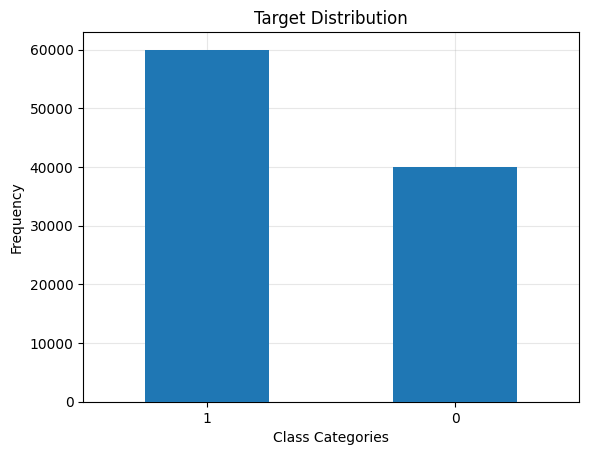

In [15]:
df[target].value_counts().plot(kind="bar", zorder=3)
plt.title("Target Distribution")
plt.xlabel("Class Categories")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3, zorder=0)
plt.xticks(rotation=0)
plt.show()

- **There is a slight class imbalance. Since the data will be already sampled, a balance sample composed of 20000 entries will be taken where each class will have 10000 entries.**

In [16]:
def undersample(df, target, n_samples):
    df_shuffled = df.sample(frac=1).reset_index(drop=True)
    df_s = []
    for value in df_shuffled[target].value_counts().to_dict():
        df_i = df_shuffled[df_shuffled[target] == value]
        df_s.append(df_i.sample(n=n_samples, random_state=42))
    return pd.concat(df_s).reset_index(drop=True)

In [17]:
# Data Sampling + Display Sample Data
df_sample = undersample(df_encoded, "diagnosed_diabetes", 10000)
print(df_sample.shape)
df_sample.head()

(20000, 31)


age  gender  ethnicity  education_level  income_level  employment_status  \
0   60       1          1                1             2                  0   
1   47       1          3                3             3                  2   
2   31       0          4                1             2                  2   
3   40       0          3                0             2                  2   
4   36       0          1                3             1                  2   

   smoking_status  alcohol_consumption_per_week  \
0               0                             1   
1               1                             2   
2               0                             4   
3               2                             1   
4               0                             0   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                  56         7.0  ...               54   
1                                 159         7.5  ...               56   
2                                  93         5.8  ...               73   
3                                 101         5.6  ...               64   
4                                 238         4.9  ...               56   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0               67             30              125                   197   
1              152            158              105                   158   
2               50            147               98                   112   
3               50            166              118                   181   
4              110            116              119                   186   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0          10.57   7.17                 28.2               4   
1           7.90   6.65                 24.3               4   
2           6.21   5.31                 24.2               4   
3          12.23   7.65                 24.5               4   
4           4.90   7.08                 18.8               4   

   diagnosed_diabetes  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [18]:
# Seperate Feature and Target
X_sample = df_sample.drop(target, axis=1)
y_sample = df_sample[target]
X_numpy = X_sample.to_numpy()
y_numpy = y_sample.to_numpy()

In [19]:
# Converting feature names from strings to indices to be used with the numpy-based dataset.
categorical_features_str = categorical_features.copy()
continuous_features_str = continuous_features.copy()
categorical_features_index = [X_sample.columns.get_loc(x) for x in categorical_features]
continuous_features_index = [X_sample.columns.get_loc(x) for x in continuous_features]

## 3. Utility Functions 
## 4. Decision Tree Implementation

- Entropy calculation function
- Information gain calculation function
- Variance-based threshold selection (Algorithm 1)
- Discretization function for continuous features
- Helper functions for tree operations

- **Originally, the Utility Functions and Decision Tree Implementation were seperate sections. For the sake of enjoying this assignment and attempting to organize it the way we usually use models from sickit-learn, I implemented a class-based decision tree classifier. All utility functions are methods of that class.**

In [20]:
class Node:
    """
    Instances of this class represent nodes of the decision tree.
    
    This class serves only as a data container.

    
    Parameters
    ----------
    feature: int, default = None
        The index of the feature at a node.
        
    split_val: int, default = None
        The split value that created a node. 
        It comes from a categorical feature, being the parent node.
        
    label: int, default = None
        It represents the predicted label class if the node is a leaf.
        
    threshold: float, default = None
        It represents the optimal threshold used to create 
        this node when splitting from its parent.
        Nodes with threshold values come from continuous features.
        This parameter is used to distinguish between categorical 
        and continuous features in some methods in the DecisionTreeClassifier class.

    children: [Node, Node, ..., Node], default = None
        A list of the children split from a node.
        There might be multiple children from categorical features.
        There will be only two children from continous features - A binary split.
        
    leaf: bool, default = False
        To specifiy if a node is a leaf or not.

    classes: [], default = None
        A list count for the labels found in a node.

    gain: float, default = None
        To store the best gain for splitting this feature.
        It is None for leaf nodes.

    depth: int, default = None
        To store the level, depth, of the current node.
    """
    def __init__(self, feature = None, split_val = None, label = None, threshold=None, children=None, leaf=False, classes=None, gain=None, depth=None):
        self.feature = feature
        self.split_val = split_val
        self.label = label
        self.threshold = threshold
        self.children = children
        self.leaf = leaf
        self.classes = classes
        self.gain = gain
        self.depth = depth

In [57]:
class DecisionTreeClassifier(BaseEstimator):
    """
    A decision tree classifier.
    
    It accepts both numpy-based and pandas-based datasets.
    The pandas-based dataset will be converted to numpy-based, after
    storing the feature names to be used later on.

    Parameters
    ----------
    
    max_depth: int, default = None
        The maximum depth of a tree. 
        If specified, the tree will continue expanding until
        it reaches a depth equal to the max_depth parameter.
        
        **It is used as a pre-pruning condition.**
        

    min_samples_split: int, default = None
        The minimum number of samples required to split a node.
        If specified, a node will not be split if the number
        of samples are less than the threshold specified.
        The majority of the labels will be picked as the predicted label.
        
        **It is used as a pre-pruning condition.**
        

    min_gain: float, default = None
        The minimum gain of the best feature split.
        If the best current split is below a certain
        threshold then the majority label will be chosen
        as the predicted label. A leaf will be created instead.
        
        **It is used as a pre-pruning condition.**
        

    purity_threshold: float, default = None
        This parameter is the proportion of the count of a label
        to the number of samples. It identifies if a node is already
        almost pure.
        
        - If number of a class / number of samples >= purity_threshold, then pick the majority as a label.
    
        It must be **<= 1**
        **It is used as a pre-pruning condition.**
        
    msd_alpha: float, default = 5
        The alpha parameter for the MSSD-Based Threshold Selection
        for continuous features.


    categorical_features: list, default = None
        A list of the indices, identifiers, of the categorical_features
        of a numpy-based dataset.
        If None, then continuous_features will be used to distinguish between
        categorical and continuous features. If both None, then the count 
        of unique values will be used to distinguish between the two types.
        As a result, a continuous feature can be considered as a categorical
        feature when the tree is more expanded and number of samples decrease.
        

    continuous_features: list, default = None
        A list of the indices, identifiers of the continuous_features
        of a numpy-based dataset.
        If None, then categorical_features will be used to distinguish between
        categorical and continuous features.
        
    
    debug: bool, default = False
        To enable the debug mode of the class.
        When enabled some logs will be displayed
        during model training.

        - If true, then each time selecting the best feature, the name of the feature,
        threshold, and best gain will be printed.


    Attributes
    ----------
    
    features_names: list, default = None
        A list of string based feature names.
        It is used to print decision tree rules.

        - If None, then string based feature names are expected
        to be as input in the method responsible for printing 
        the decision tree rules.


    target_name: str, default = None
        The name of the target variable.
        It is used to print decision tree rules.
        It can be taken when initializing the class or from the input dataset
        if the latter is pandas-based.

    
    root: Node, default = None
        The root of the decision tree


    max_depth_reached: int
        The last level of the tree.

    
    training_time: int
        The training time in seconds to fit the data 
        to a decision tree classifier

    
    features_used: set
        A set of the features used when building the tree.
        These features construct the nodes of the tree.

    
    n_nodes: int
        Number of nodes in tree.
    
    
    Raises
    ------
    ValueError:
        - if the min_samples_split is negative
        - if min_gain is negative
        - if purity_threshols is more than 1 or negative
        - if the mssd alpha is less than 1
        - The list of categorical features can only be composed of integer indices only.
          If not the case, then raise a Value Error.
        - The list of continuous features can only be composed of integer indices only.
          If not the case, then raise a Value Error.

    """

    def __init__(self, max_depth=None, min_samples_split=None, min_gain = None, purity_threshold = None, mssd_alpha=5, categorical_features = None, continuous_features = None, debug = False):
        if min_samples_split is not None and min_samples_split <= 0:
            raise ValueError("ERROR! min_samples_split must be positive.")
        
        if min_gain is not None and min_gain < 0:
            raise ValueError("ERROR! min_gain cannot be negative.")
        
        if purity_threshold is not None and (purity_threshold > 1 or purity_threshold <= 0):
            raise ValueError("ERROR! min_gain must be in the range of ]0, 1]")
        
        if mssd_alpha <= 1:
            print("The MSSD alpha value should be bigger than 1 to benefit from the use of MSSD based threshold selection.")

        if categorical_features is not None and not(all(isinstance(value, int) for value in categorical_features)):
            raise ValueError("ERROR! The list of categorical features must be composed of integer indices only.")
        
        if continuous_features is not None and not(all(isinstance(value, int) for value in continuous_features)):
            raise ValueError("ERROR! The list of continuous features must be composed of integer indices only.")
        
        if debug:
            print("Debug Mode is Enabled.")
        
        self.min_samples_split = 1 if min_samples_split is None else min_samples_split
        self.max_depth = max_depth
        self.min_gain = min_gain
        self.purity_threshold = purity_threshold
        self.mssd_alpha = mssd_alpha
        self.categorical_features = categorical_features
        self.continuous_features = continuous_features
        self.debug = debug
        
        self.features_names = None
        self.target_name = None
        self.root = None
        self.features_used = set()
        self.max_depth_reached = 0
        self.training_time = 0
        self.n_nodes = 0
        

    def _repr_html_(self):
        """ 
            To print the class in a good HTML style, similar to the sklearn one.

            Returns
            -------
            An HTML representation of the model for good display in Jupyter notebooks.
            It includes model title along with the model the arguments.
        """
        return estimator_html_repr(self)
    

    def fit(self, X, y): # The y value must be a 1D array - MAKE SURE TO DO THAT
        """
        Fit the model to the training data.
        This method accepts both pandas.DataFrame or array-like
        matrix of data. However, it converts pandas.DataFrame data
        to numpy-based matrix.
        Paramteres
        ----------

        X: np.ndarray or pandas.DataFrame
            A matrix of data for each feature with shape (n_samples, n_features).

        y: np.ndarray or pandas.DataFrame
            A list of labels for the target variable with shape (n_samples,).

        Raises
        ------
        ValueError
            - If the number of samples in the feature matrix does not match
            the number of samples in the target variable array.
            - If the number of samples is less than the number of the minimum
            samples per split.
        
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("Error! X and y do not have matching rows.")
        elif X.shape[0] < self.min_samples_split:
            raise ValueError("Error! The data has less than the minimum samples (min_samples_split)")
        
        if isinstance(X, pd.DataFrame):
            self.features_name = X.columns
            X = X.to_numpy()

        if isinstance(y, (pd.DataFrame, pd.Series)):
            self.target_name = y.columns[0]
            y = y.to_numpy().ravel()
        y = y.astype(int)

        training_start_time = time.time()
        self.root = self.grow(X, y, 0, last_feature = None)
        self.training_time = time.time() - training_start_time


    def grow(self, X_, y_, depth_, last_feature, value_ = None, chosen_features = None):
        """
        A helper method for the fit method to create the tree node by node.
        It recursively grows the decision tree.

        Parameteres
        -----------

        X_: np.ndarray
            Feature matrix of the dataset.
            
        y_: np.ndarray
            Feature matrix of the target variable.

        depth_: int
            The current depth of the decision tree.

        last_feature: int
            The last best feature before splitting.
            This is used to prevent same continuous feature to be in the same 
            direct branch as parent and direct child.

        value_: int
            The value that split the node.
            It comes from categorical features.

        chosen_features: list
            A list of the previous best categorical features.
            This is used to ensure the same categorical features are not considered 
            for best feature in the same branch, the same path from the root to a leaf.
        """

        n_samples, n_features = X_.shape
        unique, counts = np.unique(y_, return_counts=True)

        # Pre-pruning conditions ---- START

        if depth_ > self.max_depth_reached:
            self.max_depth_reached = depth_
        
        if len(unique) == 1:
            return self.get_leaf_value(y_, depth_, value_)

        if self.purity_threshold is not None:
            ratio = (counts / len(y_)) >= self.purity_threshold
            if any(ratio):
                return self.get_leaf_value(y_, depth_, value_)
            
        if self.max_depth != None and depth_ == self.max_depth:
            return self.get_leaf_value(y_, depth_, value_)

        if n_samples < self.min_samples_split:
            return self.get_leaf_value(y_, depth_, value_)
        
        # Pre-pruning conditions ---- END
        
        if chosen_features is None:
            chosen_features = []
            
        features = [f for f in np.arange(n_features) if (f not in chosen_features and f != last_feature)]
        best = self.best_feature(X_, y_, features)
        
        if (best is None) or (self.min_gain is not None and best["best_gain"] < self.min_gain):
            return self.get_leaf_value(y_, depth_, value_)
            
        self.features_used.add(best["feature_name"]) 
        
        children_nodes = []
        if self.feature_type(X_, best["feature_name"]) == "categorical": # Categorical features should not be discovered again, only continuous can because they give binary splits so they did not cover all values
            chosen_features.append(best["feature_name"])
            for val in np.unique(X_[:,best["feature_name"]]):
                filter_ = X_[:,best["feature_name"]] == val
                children_nodes.append(self.grow(
                    X_ = X_[filter_, :], 
                    y_ = y_[filter_], 
                    depth_ = depth_+1, 
                    value_ = val, 
                    chosen_features=chosen_features.copy(), 
                    last_feature=best["feature_name"]
                ))
        
        else:
            left_sample, right_sample = self.discretize(X_, best["feature_name"], best["threshold"])
            children_nodes.append(self.grow(
                X_ = X_[left_sample], 
                y_ = y_[left_sample], 
                depth_ = depth_+1, 
                chosen_features=chosen_features.copy(), 
                last_feature=best["feature_name"]
            )) # Left Node
            children_nodes.append(self.grow(
                X_ = X_[right_sample], 
                y_ = y_[right_sample], 
                depth_ = depth_+1, 
                chosen_features=chosen_features.copy(), 
                last_feature=best["feature_name"]
            )) # Right Node
        self.n_nodes += 1
        return Node(
            feature = best["feature_name"], 
            children = children_nodes, 
            threshold = best["threshold"], 
            split_val = value_, 
            classes=np.unique(y_, return_counts=True)[1],
            gain = best["best_gain"],
            depth = depth_
        )

    
    def best_feature(self, X_, y_, features):
        """
        Loops over all features and pick the best feature to split
        based on information gain.

        Parameters
        ----------
        X_: np.ndarray
            A matrix of data for each feature.

        y_: np.ndarray
            Feature matrix of the target variable.

        features: list
            The list of features to check.

        Returns
        -------
        Dictionary
        A set of information about the best feature:
            - feature_name: the name of the best feature,
            - threshold: the most optimal threshold used to choose the best feature,
            - best_gain: the information gain of the best feature.
        """
        
        main_entropy= self.entropy(y_)
        best = {
            "feature_name":None,
            "threshold":None,
            "best_gain":-np.inf,
        }
        for feature in features:
            if self.feature_type(X_, feature) == "categorical":
                gain = self.information_gain(X_, y_, feature, None, main_entropy)
                if gain > best["best_gain"]:
                    best.update({ 
                        "feature_name": feature,
                        "threshold":None,
                        "best_gain": gain
                    })# O(1)
            else:
                thresholds = self.mssd_selection(X_[:, feature], alpha=self.mssd_alpha)
                if len(thresholds) != 0:
                    gain_threshold = []
                    for threshold in thresholds:
                        gain_threshold.append(self.information_gain(X_, y_, feature, threshold, main_entropy))
                    optimal_threshold = list(thresholds)[np.argmax(gain_threshold)]
                    gain = np.max(gain_threshold)
                    if gain > best["best_gain"]:
                        best.update({
                            "feature_name": feature,
                            "threshold": optimal_threshold,
                            "best_gain": gain
                        })
        if best["best_gain"] == -np.inf:
            if self.debug:
                print("No valid splits found")
                print()
            return None
        if self.debug:
            print(f"The best feature is {X_sample.columns[best["feature_name"]]} with threshold {best["threshold"]} and gain {best["best_gain"]}")
        return best

    
    def get_leaf_value(self, y_, depth_, split_val=None): # You can also do the categorical method
        """
        To create a leaf node that with a label of the
        most common class.

        Parameters
        ----------
        y_: np.ndarray
            Feature matrix of the target variable.

        split_val: int
            The value to split the node leading to creating a leaf.

        
        Returns
        ------
        Node
        Returns a leaf node.


        """
        unique, counts = np.unique(y_, return_counts=True)
        self.n_nodes += 1
        return Node(
            leaf=True, 
            label=unique[np.argmax(counts)], 
            split_val = split_val, 
            classes=counts,
            depth=depth_
        )
        
    def feature_type(self, X_, feature):
        """
        To identify if a feature is categorical or continuous

        Parameters
        ----------

        X_: np.ndarray
            A matrix of data for each feature.

        feature: int
            The index of the feature to identify

        
        Returns
        -------
        str

        
        Note
        ----

        If categorical_features and continuous_features are not given, then automatic
        feature type categorization will be used: if unique values of a feature are less than 10
        then it is a categorical feature. 
        This filter can be applied before growing the tree. This in return will enable
        to have the original list of feature types. However, having a dynamic feature 
        type categorization yielded better scores.
        
        The type of feature: *categorical* or *continuous*

        """

        if (self.categorical_features is not None and len(self.categorical_features) != 0 and feature in self.categorical_features):
            return "categorical"
        
        if (self.continuous_features is not None and len(self.continuous_features) != 0 and feature in self.continuous_features):
            return "continuous"
            
        if len(np.unique(X_[:, feature])) < 10:
            return "categorical"
        return "continuous"
        
    def entropy(self, y_):
        """
        Calculates the entropy of a target variable y_
        Entropy is a measure of impurity or disorder in data.

        p_i represents the probability of getting class i.
        -log_2(p_i) is the number of bits to messages with probability p_i.
        -p_i * log_2(p_i) is the expected number to encode class i.


        Parameters
        ----------
        y_: np.ndarray
            Feature matrix of the target variable.

        Returns
        -------
        float
        Entropy value
        """
        if len(y_) == 0:
            return 0.0
        ps = np.bincount(y_) / len(y_)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def information_gain(self, X_, y_, feature, threshold, main_entropy):
        """
        Calculates the information gain coming from splitting the data 
        on a given feature and a threshold. Information gain is used to select
        the best feature to split the data on. It describes uncertainty
        reduction when using a specific feature to split the data.

        Parameters
        ----------
        X_: np.ndarray
            A matrix of data for each feature.
            
        y_: np.ndarray
            Feature matrix of the target variable.

        feature: int
            The index of the feature to split the data on.
    
        threshold: float or None
            -If float, then the feature is continuous and MSSD-Based Threshold Selection will be performed.
            -If None, then the feature is categorical and ID3 algorithm logic will be used to split the samples.

        main_entropy: float
            Entropy of the current node before splitting.

        Returns
        -------
        float
        Information gain from splitting on a feature with a specific threshold.
        """
        
        if len(X_) == 0:
            return 0
        S_s = self.split(X_, y_, feature, threshold)
        w_ps = np.sum([len(S) / len(X_) * self.entropy(S) for S in S_s ])
        return main_entropy - w_ps
    
    def split(self, X_, y_, feature, threshold):
        """
        Splits a feature using a threshold.

        Parameters
        ----------
        X_: np.ndarray
            A matrix of data for each feature.
            
        y_: np.ndarray
            Feature matrix of the target variable.

        feature: int
            The feature identifier.

        threshold: float or None
            The threshold to split the feature.
            - If float then the feature will have a binary split. 
            The left sample are of values less than the threshold.
            The right sample are of values bigger than or equal to the threshold.
            - If None then the feature will have as many splits as the feature's unique values.


        Returns
        -------
        list
        The labels of each split to be used for information gain.
        """
        splits = []
        if(threshold is None):
            for val in np.unique(X_[:,feature]):
                splits.append(y_[X_[:, feature] == val])
        else:
            left_sample, right_sample = self.discretize(X_, feature, threshold)
            splits.extend([y_[left_sample], y_[right_sample]])
        return splits
    
    def mssd(self, X_):
        """
        Compute the Mean Squared Successive Different (MSSD) of a continuous feature.

        The MSSD captures the variation between consecutive sorted feature values.
        Like the midpoint split, gaps between two consecutive features that exceed
        a certain multiple of the MSSD are considered significant shifts and used as
        potential thresholds.

        
        Parameters
        ----------
        X_: np.ndarray
            A matrix of data for each feature.

        
        Returns
        -------
        float
        MSSD value.


        """
        n = len(X_)
        result = 0
        for index in range(n - 1):
            result += (X_[index + 1] - X_[index]) ** 2
        return result / (n-1) if n > 1 else 0
    
    def mssd_selection(self, X_, alpha):
        """
        Computes the MSSD through the mssd method and finds potential thresholds
        to split a continuous feature.

        
        Parameters
        ----------
        X_: array or np.ndarray
            A list of feature values.

        alpha: float
            α is a multiple acting as a scaling parameter. The higher it is
            the fewer thresholds there are, leading to larger gaps.
            Very high α values can thus lead to underfitting and very low
            can lead to overfitting.
            α must be larger than 1, otherwise it would defeat the true
            motivation behind MSSD which is finding meaningful gaps between
            the values to split a continuous feature.

        
        Returns
        -------
        list
        A list of potential thresholds


        """
        u = np.unique(X_)
        mssd_ = self.mssd(u)
        T = set()
        for index in range(len(u) - 1):
            g = (u[index + 1] - u[index])
            if g > alpha * mssd_:
                t = (u[index] + u[index + 1]) / 2
                T.add(t)
        return T
    
    def discretize(self, X_, feature, threshold):
        """
        Discretize a specific continuous feature. It provides two
        different samples, a left sample, and a right sample.

        
        Parameters
        ----------
        X_: np.ndarray
            A matrix of data for each feature.
            
        feature: int
            The index of the feature to discretize.

        threshold: float
            The threshold used to split the feature.


        Returns
        -------
        tuple
        A tuple of the left sample filter and the right sample filter.

        """
        return (X_[:, feature] < threshold, X_[:, feature] >= threshold)
        
    def predict(self, X_test):
        """
        Predict class labels for the input samples.

        
        Parameters
        ----------
        X_test: np.ndarray or pd.DataFrame
            The input samples to predict. If a pandas dataframe
            is provided, then it will be converted to a numpy list.
            
        
        Returns
        -------
        list
        A list of the predicted labels

        """
        
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.to_numpy()
        predictions = [self.predict_helper(sample, self.root) for sample in X_test]
        return predictions
    
    def predict_helper(self, sample, node):
        """
        Recursively predict a single sample starting from a given node.

        
        Parameters
        ----------
        sample: list
            Feature values of one entry.
            This method expects only a sample of one row.

        node: Node
            the current node of the tree.

        
        Returns
        -------
        int
        predicted class label for the sample

        
        Notes
        -----
        - If the current value is not found in the decision tree, then the most common class label
        will be returned as predicted label.

        """
        if node.leaf:
            return node.label
        if node.threshold is None: # Categorical
            for child in node.children:
                if child.split_val == sample[node.feature]:
                    return self.predict_helper(sample, child)
            return np.argmax(node.classes) # If the current sample value is not recognized in the model -- Not shared with the training data
        if node.threshold is not None: # Continuous
            if sample[node.feature] < node.threshold:
                return self.predict_helper(sample, node.children[0]) # Left
            if sample[node.feature] >= node.threshold:
                return self.predict_helper(sample, node.children[1]) # Right

    def get_rules(self, feature_names = None, target_name = None):
        """
        Print the decision tree rules. This is a technique to
        make the decision tree model explainable and interpretable.

        Parameters
        ----------
        feature_names: list, default = None
            A list of string based feature names to print human-readable rules.

            - If None then the features_names attribute from the DecisionTreeClassifier
            class will be used instead. If also None, then a Value Error will be raised.
    
        target_name: list, default = None
            A string based name of the target variable.
            -If None then the target_name attribute from the DecisionTreeClassifier
            class will be used instead. If also None, then an error will be raised.

        Raises
        ------
        ValueError:
        - If string based features names or target name are not
        provided or stored in the class instance.
        """
        
        features = feature_names if feature_names is not None else self.features_names
        target = target_name if target_name is not None else self.target_name
        
        if features is None:
            raise ValueError("ERROR! Feature Names Are Not Available.")
            
        if self.root.leaf:
            print(f"{target_name} = {node.label}", end="\n")
            
        self.get_rules_helper(self.root, features, target, "If ")
    
    def get_rules_helper(self, node, features, target, rule):
        """
        Recursively traverse the decision tree to print the rules.
        Rules are logic statements of them form a1 ∧ a2 ∧ ... ∧ an Then label
        Each path or branch of the tree represents a set of conjunctions
        and each split represents a set of disjunctions. The leaf represents
        the conclusion of the statement, which is a label.


        Parameters
        ----------
        node: Node
            The current node in the decision tree.

        
        features: list
            str based feature names used to write the tree rules.

        
        target: str
            Name of the target variable

        
        rule: str
            The accumulated rule string so far.

            
        Example
        -------
        - (Feature_1 = a) ∧ (Feature_2 = z) Then target = 0
        - (Feature_1 = a) ∧ (Feature_2 = n) Then target = 1
        """
        if node.leaf:
            print(rule, end="")
            print(f"Then {target} = {node.label}", end="\n\n")
            return
        rule_ = rule[:] # copy rule to make sure it is not changed for the other recursions
        if node.threshold is None: #Categorical
            rule_ = rule_ + f"({features[node.feature]} = "
            for child in node.children:
                self.get_rules_helper(
                    child, 
                    features, 
                    target, 
                    rule_ + f"{child.split_val}) {"∧" if not(child.leaf) else ""} "
                )
        else:
            self.get_rules_helper(
                node.children[0], 
                features, 
                target, 
                rule_ + f"({features[node.feature]} < {node.threshold}) {"∧" if not(node.children[0].leaf) else ""} "
            )
            
            self.get_rules_helper(
                node.children[1], 
                features, 
                target, 
                rule_ + f"({features[node.feature]} >= {node.threshold}) {"∧" if not(node.children[1].leaf) else ""} "
            )

    def post_pruning(self, X_valid, y_valid, last_accuracy):
        """
        Post prunes the tree after training

        
        Parameters
        ----------
        X_valid: np.ndarray
            A matrix of validation data for each feature.

        y_valid: np.ndarray
            Validation feature matrix of the target variable.

        last_accuracy: float
            The accuracy got after training the model 
            and validating it with the validation data.

        
        Returns
        -------
        tuple
        - pruned_features: the name of the features pruned
        - accuracies_post_pruning: the accuracy achieved after each iteration
        - n_nodes: the number of nodes after each iteration
        - time: the duration of the post pruning process
        
        """
        time_started = time.time()
        pruned_features, accuracies_post_pruning, n_nodes = self.post_pruning_helper(X_valid, y_valid, last_accuracy, 0, [], {0: last_accuracy}, {})
        return (pruned_features, accuracies_post_pruning, n_nodes, time.time() - time_started)
    
    def post_pruning_helper(self, X_valid, y_valid, last_accuracy, nbr, pruned_features, accuracies, n_nodes): 
        
        """
        To post prune the tree. The method collectes a set of all
        available twigs in the tree. Then picks the twig with
        the smallest gain and prunes it. If this modification
        drops accuracy then the modification will be reversed
        and the process will stop. Otherwise, all twigs
        will be collected again and the same steps will
        be repeated.

        A *twig* is defined as a node whose children are all leaf nodes.
        
        Parameters
        ----------
        X_valid: np.ndarray
            A matrix of validation data for each feature.

        y_valid: np.ndarray
            Validation feature matrix of the target variable.

        last_accuracy: float
            The accuracy got after training the model 
            and validating it with the validation data.

        nbr: int
            The count of the number of prunings applied.

        pruned_features: list
            A string based feature names of the pruned features.

        accuracies: dict
            To store the drop in accuracy across iterations.
            {Iteration Number: Accuracy}

        n_nodes: dict
            To store the drop in the number of nodes across iterations.
            {Iteration Number: Number of nodes}

        
        Returns
        -------
        The pruned features.
        
        """
        twigs = self.find_twigs(self.root, None, [])
        if len(twigs) == 0:
            return
        gains = [twig["node"].gain for twig in twigs]
        least_twig = twigs[np.argmin(gains)]
        
        new_child = Node(
            leaf=True, 
            feature = least_twig["node"].feature,
            split_val=least_twig["node"].split_val, 
            threshold=least_twig["node"].threshold, 
            label = np.argmax(least_twig["node"].classes), 
            classes = least_twig["node"].classes,
            depth = least_twig["node"].depth - 1
        )
        
        self.change_child(least_twig["parent"], least_twig["node"], new_child)

        current_accuracy = classification_report(self.predict(X_valid), y_valid, output_dict=True)["accuracy"]
        
        if current_accuracy >= last_accuracy:
            print(f"Sucessfull Pruning Number {nbr} with accuracy score {current_accuracy}.")
            pruned_features.append(new_child.feature)
            self.n_nodes -= len(least_twig["node"].children) - 1
            n_nodes[nbr] = self.n_nodes 
            accuracies[nbr] = current_accuracy
            return self.post_pruning_helper(X_valid, y_valid, current_accuracy, nbr+1, pruned_features, accuracies, n_nodes)
        else:
            print(f"Post pruning terminated with a drop in accuracy score {current_accuracy} from {last_accuracy}")
            self.change_child(least_twig["parent"], new_child, least_twig["node"])
            return (pruned_features, accuracies, n_nodes)
                        
    def change_child(self, parent_node, previous_child, new_child):
        """
        Replaces a previous child node of a given parent with a new child node.

        Parameters
        ----------
        
        parent_node: Node or None
            The parent node of whose child will be replaced.
            -If Node then the node to be changed is not the root.
            -If None then the node to be changed is the root.

        previous_child: Node
            The existing child to be replaced.

        new_child: Node
            The new node that will repalce the previous child node.
        """
        if parent_node is None: # Root node
            self.root = new_child
        for index, child in enumerate(parent_node.children):
            if child == previous_child:
                parent_node.children[index] = new_child
    
    def find_twigs(self, node, parent, twigs):
        """
        Recursively catalog all twigs in the current decision tree.
        
        Parameters
        ----------
        node: Node
            The current node to be examined to check if 
            its children are leaf nodes.

        parent: Node or None
            The parent of the current node.
            -If None then current node is root

        twigs: list of dict
            A list used to store information aboug each identified twig.
            Each item is of the form:
                {
                "node": Node, current identified twig,
                "parent": Node, parent of the twig
                }

        Returns
        -------
        list of dict
        The updated list of twig dictionaries.
        """
        if node.leaf:
            return []
        is_twig = True
        for child in node.children: # Check if the current node is a twig
            if not(child.leaf):
                is_twig = False
                break
        if is_twig:
            twigs.append({"node":node, "parent":parent})
        else: # If node not a twig Then check its children
            for child in node.children:
                self.find_twigs(child, node, twigs)
        return twigs

    def plot_tree(self, feature_names):
        """
            To plot the structure of the tree.
            It represents how the model splits data according to feature values.
            Each condition shows a decision rule line and each "leaf" line shows
            the final predicted value. This strucutre is based on the sklearn
            tree moodule produced using the tree.export_text() function.
            
            Parameters
            ----------
            feature_names: list
                A list of string-based feature names.
            
            Raises
            ------
            ValueError:
            - If feature names is not given in the input of this method
            and not given when initializing the class.

            Example
            -------
            | Feature_1 = 5
            | | Feature_2 < 25
            | | | --- leaf = 1
            | | Featrure_2 >= 25
            | | | --- leaf = 0
            | Feature_1 = 6
            | | --- leaf = 1

        """
        features = feature_names if feature_names is not None else self.features_names
        
        if features is None:
            raise ValueError("ERROR! Feature Names Are Not Available.")
            
        self.plot_tree_helper(self.root, feature_names)

    def plot_tree_helper(self, node, feature_names):
        """
        A helper method to recursively plot the condition rules, bars, and final leaf.

        Parameters
        ----------
        node: Node
            The current node to check and print.
        
        feature_names: list
            A string-based list of feature names.
            
        """
        bars_length = node.depth
        bars = "   ".join(['|' for bar in range(bars_length + 1)])
        if node.leaf:
            print(f"{bars} --- leaf: [{node.label}]")
            return
        if not(node.threshold):
            for child in node.children:
                print(f"{bars} --- {feature_names[node.feature]} = {child.split_val}")
                self.plot_tree_helper(child, feature_names)
        else:
            print(f"{bars} --- {feature_names[node.feature]} < {node.threshold}")
            self.plot_tree_helper(node.children[0], feature_names)
            print(f"{bars} --- {feature_names[node.feature]} >= {node.threshold}")
            self.plot_tree_helper(node.children[1], feature_names)
        

## 5. PART 1: ID3 with 5-Fold Cross-Validation

- Prepare 5-fold cross-validation splits
- Define hyperparameter variations to test
- Training loop (train, predict, evaluate, store results)
- Aggregate and identify best model
- Print decision rules for best model
- Create results table comparing variations

In [22]:
# Training loop & Storing results
def cross_val_score(X, y, min_samples_split = 1, mssd_alpha=5, digits=5, log=True, categorical_features=None, continuous_features=None): # 5 was randomly chosen as the MSSD alpha for testing purposes.
                                                   # The hyperparameter variations testing is done of course after this and the next blocks of code.
    
    kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    folds = []
    
    for k, (train_index, test_index) in enumerate(kf.split(X, y)):
        
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split, mssd_alpha=mssd_alpha, categorical_features=categorical_features, continuous_features=continuous_features)
        X_train = X[train_index,:]
        y_train = y[train_index]
        clf.fit(X_train, y_train)
        
        X_test = X[test_index, :]
        y_test = y[test_index]
        y_pred = clf.predict(X_test)
        if log:
            print(f"Training Accuracy Score Error for fold {k + 1}: {classification_report(clf.predict(X_train), y_train, digits=digits, output_dict=True)["accuracy"]}", end="\n\n")
            print(classification_report(y_pred, y_test, digits=digits), end="\n\n\n")
        
        folds.append({
            "model": clf,
            "report":classification_report(y_pred, y_test, output_dict=True),
            "y_pred":y_pred,
            "y_test":y_test,
            "X_test":X_test
        })
    
    return folds

In [23]:
folds = cross_val_score(X_numpy, y_numpy)

Training Accuracy Score Error for fold 1: 1.0

              precision    recall  f1-score   support

           0    0.99850   0.99800   0.99825      2001
           1    0.99800   0.99850   0.99825      1999

    accuracy                        0.99825      4000
   macro avg    0.99825   0.99825   0.99825      4000
weighted avg    0.99825   0.99825   0.99825      4000



Training Accuracy Score Error for fold 2: 1.0

              precision    recall  f1-score   support

           0    0.99700   0.99900   0.99800      1996
           1    0.99900   0.99701   0.99800      2004

    accuracy                        0.99800      4000
   macro avg    0.99800   0.99800   0.99800      4000
weighted avg    0.99800   0.99800   0.99800      4000



Training Accuracy Score Error for fold 3: 1.0

              precision    recall  f1-score   support

           0    0.99850   0.99850   0.99850      2000
           1    0.99850   0.99850   0.99850      2000

    accuracy                        0

In [24]:
# A manuel simulation of the decision tree classifier logic

# alpha = 5 was chosen only for testing purposes and not because it is the most optimal value.

X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(mssd_alpha=5, categorical_features=categorical_features_index, debug=True)
clf.fit(X_train, y_train)
def get(feature):
    return X_sample.columns.get_loc(feature)

# # TEST THE MODEL FOR THE WHOLE DATASET
filters = [(X_numpy[:,get("diabetes_stage")] == k) for k in X_sample["diabetes_stage"].value_counts().to_dict()]
print(X_sample["diabetes_stage"].value_counts().to_dict())
for filter_ in filters:
    X_, y_ = X_numpy[filter_], y_numpy[filter_]
    features = [f for f in range(X_.shape[1])]
    clf.best_feature(X_, y_, features)
    print()
    print(X_sample["diabetes_stage"].value_counts().to_dict())
    print(np.asarray(np.unique(y_, return_counts=True)))

Debug Mode is Enabled.
The best feature is diabetes_stage with threshold None and gain 0.9964093697817975
The best feature is hba1c with threshold 6.7 and gain 0.5173693817687971
The best feature is income_level with threshold None and gain 0.3262696689146701
The best feature is ethnicity with threshold None and gain 0.3166890883150208
The best feature is alcohol_consumption_per_week with threshold None and gain 1.0
The best feature is alcohol_consumption_per_week with threshold None and gain 0.5
The best feature is ethnicity with threshold None and gain 1.0
The best feature is hba1c with threshold 6.395 and gain 0.5052347069926497
The best feature is education_level with threshold None and gain 0.24715018363696709
The best feature is gender with threshold None and gain 1.0
The best feature is ethnicity with threshold None and gain 0.19920350542916282
The best feature is gender with threshold None and gain 0.9182958340544896
{4: 9965, 1: 7957, 0: 1999, 2: 55, 3: 24}
The best feature is

- **All 5 fold cross validation have near-perfect scores (0.99) in most classification metrics for both testing and training phases, except some precision having perfect 1.0 in the third and fourth fold during the testing phase. The near-perfect scores can be indicative of either high performance model or overfitting. However, since not only the training score was high but also the testing score, this suggests that model generalizes pretty well on unseen data. After verification, the high score was due to a data leakage through a very high correlated feature called *diabetes_stages.***
- **The block of code directly above is a manuel simulation of the decision tree classifier logic. The very first best feature, root of the tree, was the feature *diabetes_stages.* This feature had a best gain of 0.996. 92.5% of the whole sampled data can be *purely* classified solely using the *diabetes_stage* feature. The same situation is exhibited in the population dataset, where 99.6% of the whole dataset can be *purely* classified solely using this feature. Consequently, this explains the very high result of both the training and the testing results.**
- **The values that solely classified the dataset are:**
    - **4**
    - **1**
    - **0**

- **To further test hyperparameter variation, pick the best model out of the 5-fold cross validation, and have concrete discussion, analysis, and conclusions, the *diabetes_stages* feature will be dropped. This will also be useful for feature importance analysis and analyze the difference in scores after dropping this feature.**
- **Note, the same results were found even after trying one-hot-encoding instead of label encoding all features.**
- **The table below describes the situation quantitavely by showing that three values instantly create 3 leaves.**

| Value | Count     | Leaf | Label     |
|-------|-----------|------|-----------|
| 4     | 11879     | True | 1         |
| 1     | 6479      | True | 0         |
| 0     | 1561      | True | 0         |
| 2     | 57        | False| [31+, 26-]|
| 3     | 24        | False| [13+, 11-]|


**Next steps in PART5:**
- **Remove the *diabetes_stage* feature.**
- **Look for the best MSSD alpha parameter using 5-fold cross-validation.**
- **Pick the best alpha value according to the mean accuracy score of all 5 fold cross validation.**
- **Do 5-fold cross-validation again using the best alpha parameter**

In [23]:
X_filtered = X_numpy[:, :-1]
categorical_features_index_filtered = [index for index in categorical_features_index if index != 29]
categorical_features_str_filtered = [name for name in categorical_features_str if name != "diabetes_stage"]

In [26]:
alpha_values = range(2,11)
accuracy_values = []
reports = [np.nan] * len(alpha_values)
k_fold = 5
for index, alpha in enumerate(alpha_values):
    print(f"Testing α = {alpha}", end =" ")
    
    folds_filtered = cross_val_score(X_filtered, y_numpy, alpha, log=False)
    for fold in folds_filtered: # provide a mean classification_report
        reports[index] = reports[index] + pd.DataFrame(fold["report"]).transpose() if reports[index] is not np.nan else pd.DataFrame(fold["report"]).transpose()
    reports[index] = reports[index] / k_fold
    current_accuracy = np.mean([fold["report"]["accuracy"] for fold in folds_filtered])
    
    print(f" mean accuracy score from 5-fold cross validation: {current_accuracy}")
    
    accuracy_values.append(current_accuracy)

best_alpha = alpha_values[np.argmax(accuracy_values)]
best_accuracy = np.max(accuracy_values)
print(f"The best alpha value is {best_alpha} that resulted in a mean accuracy score of {best_accuracy}")

Testing α = 2  mean accuracy score from 5-fold cross validation: 0.8925000000000001
Testing α = 3  mean accuracy score from 5-fold cross validation: 0.89265
Testing α = 4  mean accuracy score from 5-fold cross validation: 0.89275
Testing α = 5  mean accuracy score from 5-fold cross validation: 0.8929
Testing α = 6  mean accuracy score from 5-fold cross validation: 0.8930999999999999
Testing α = 7  mean accuracy score from 5-fold cross validation: 0.8933500000000001
Testing α = 8  mean accuracy score from 5-fold cross validation: 0.8935000000000001
Testing α = 9  mean accuracy score from 5-fold cross validation: 0.8938499999999999
Testing α = 10  mean accuracy score from 5-fold cross validation: 0.8939499999999999
The best alpha value is 10 that resulted in a mean accuracy score of 0.8939499999999999


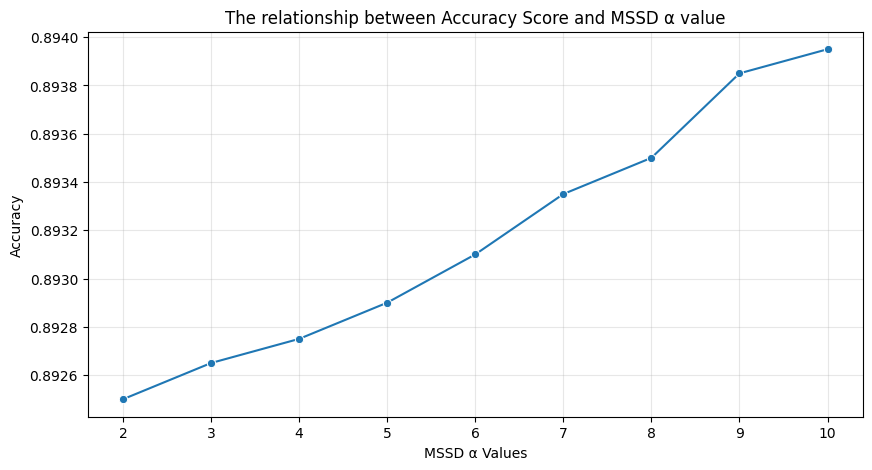

In [27]:
# Visualize Accuracy
plt.figure(figsize=(10,5))
sns.lineplot(x=alpha_values, y=accuracy_values, marker='o')
plt.grid(True, alpha=0.3, zorder=0)
plt.title("The relationship between Accuracy Score and MSSD α value")
plt.xlabel("MSSD α Values")
plt.ylabel("Accuracy")
plt.show()

- **The above graph exhibits a positive relationship between alpha and mean accuracy score of 5-fold cross validation. As alpha increases, the mean accuracy score increases as well. However the increase is not significant and overall improvement is modest.**
- **Best alpha value is: α = 10**

In [24]:
# best_alpha = 10 #-- In case of not running the code that gives the best_alpha variable

In [32]:
folds_filtered = cross_val_score(X_filtered, y_numpy, mssd_alpha = best_alpha)

Training Accuracy Score Error for fold 1: 1.0

              precision    recall  f1-score   support

           0    0.93100   0.86807   0.89843      2145
           1    0.85850   0.92561   0.89079      1855

    accuracy                        0.89475      4000
   macro avg    0.89475   0.89684   0.89461      4000
weighted avg    0.89738   0.89475   0.89489      4000



Training Accuracy Score Error for fold 2: 1.0

              precision    recall  f1-score   support

           0    0.93700   0.87366   0.90422      2145
           1    0.86450   0.93208   0.89702      1855

    accuracy                        0.90075      4000
   macro avg    0.90075   0.90287   0.90062      4000
weighted avg    0.90338   0.90075   0.90088      4000



Training Accuracy Score Error for fold 3: 1.0

              precision    recall  f1-score   support

           0    0.94350   0.86878   0.90460      2172
           1    0.85750   0.93818   0.89603      1828

    accuracy                        0

- **While the scores are still high, there was a drastic drop from the previous scores with the *diabetes_stages* feature.**
- **The average accuracy score here is approximately 0.90 which was 0.99 in the previous 5-fold cross validation test.**
- **All models in the 5-fold cross validation were able to recognize and avoid False Positives more than False Negatives as shown in the high precision score for class 0. On the contrary, the opposite case was exhibited for class 1 where False Negatives were avoided better than False Positives exhibited in the high recall score. Furthermore, all models showed similar behavior for both classes in the f1-score. Both classes had similar f1 scores, the 0th class had 0.90 on average and 1st had 0.89 on average.**

In [33]:
# Identify Best Model Based on Overall Accuracy
accuracies = [folds_filtered[k]["report"]["accuracy"] for k in range(len(folds_filtered))]
best_index = np.argmax(accuracies)
best_accuracy = np.max(accuracies)
best_fold = folds_filtered[best_index]
best_model = folds_filtered[best_index]["model"]

In [31]:
best_model.get_rules(X_sample.columns.tolist(), target)

If (hba1c < 6.495) ∧ (family_history_diabetes = 0.0) ∧ (waist_to_hip_ratio < 0.835) ∧ (ethnicity = 0.0) ∧ (hba1c < 6.375) ∧ (alcohol_consumption_per_week = 0.0) ∧ (waist_to_hip_ratio = 0.74)  Then diagnosed_diabetes = 0

If (hba1c < 6.495) ∧ (family_history_diabetes = 0.0) ∧ (waist_to_hip_ratio < 0.835) ∧ (ethnicity = 0.0) ∧ (hba1c < 6.375) ∧ (alcohol_consumption_per_week = 0.0) ∧ (waist_to_hip_ratio = 0.77) ∧ (age = 22.0)  Then diagnosed_diabetes = 0

If (hba1c < 6.495) ∧ (family_history_diabetes = 0.0) ∧ (waist_to_hip_ratio < 0.835) ∧ (ethnicity = 0.0) ∧ (hba1c < 6.375) ∧ (alcohol_consumption_per_week = 0.0) ∧ (waist_to_hip_ratio = 0.77) ∧ (age = 60.0)  Then diagnosed_diabetes = 1

If (hba1c < 6.495) ∧ (family_history_diabetes = 0.0) ∧ (waist_to_hip_ratio < 0.835) ∧ (ethnicity = 0.0) ∧ (hba1c < 6.375) ∧ (alcohol_consumption_per_week = 0.0) ∧ (waist_to_hip_ratio = 0.78)  Then diagnosed_diabetes = 0

If (hba1c < 6.495) ∧ (family_history_diabetes = 0.0) ∧ (waist_to_hip_ratio < 0.835) ∧ 

In [32]:
# Result Table
for index, report in enumerate(reports):
    reports[index] = report.iloc[:-2, :-1]

In [33]:
# # save reports
# for index, report in enumerate(reports):
#     report.to_csv(f"report_{index}.csv")

In [34]:
report

precision    recall  f1-score     support
0               0.92760  0.869212  0.897416  2134.60000
1               0.86030  0.922433  0.890229  1865.40000
accuracy        0.89395  0.893950  0.893950     0.89395
macro avg       0.89395  0.895822  0.893823  4000.00000
weighted avg    0.89632  0.893950  0.894077  4000.00000

In [35]:
results_table = pd.DataFrame(columns=[f"alpha_{a}" for a in alpha_values])
for index, report in enumerate(reports):
    results_table[f"alpha_{alpha_values[index]}"] = [
        report.loc["accuracy", :].values[0],
        report.loc[:, "precision"].iloc[0],
        report.loc[:, "recall"].iloc[0],
        report.loc[:, "f1-score"].iloc[0],
        
        report.loc[:, "precision"].iloc[1],
        report.loc[:, "recall"].iloc[1],
        report.loc[:, "f1-score"].iloc[1]
    ]
results_table.index = ["accuracy", "precision_0", "recall_0","f1-score_0", "precision_1", "recall_1", "f1-score_1"]
print(end="\n\n")
results_table.style.set_caption("Result Table to Compare Scores due to Variation in Alpha Values")

- **The above table exhibits a moderate increase in all scores as the value of MSSD alpha increases. For instance, for alpha = 2 the mean accuracy of the 5-fold cross validation was approximatley 0.893 where it increased to approximately 0.894.**
- **5-fold cross validation was preferred over doing the best model for robust analysis only.**

## 6. Error Analysis (Part 1)


- Find misclassified samples from best model
- Analyze misclassified examples (predicted vs actual)
- Feature importance analysis
- Confusion patterns discussion

In [36]:
# Misclassified samples identification
y_pred_best_model = folds_filtered[best_index]["y_pred"]
y_test_best_model = folds_filtered[best_index]["y_test"]
X_test_best_model = folds_filtered[best_index]["X_test"]

misclassified = y_pred_best_model != y_test_best_model

X_misclassified = X_test_best_model[misclassified]
y_test_misclassified = y_test_best_model[misclassified]
y_pred_misclassified = np.asarray(y_pred_best_model)[misclassified]

In [37]:
# Analysis
X_misclassified_df = pd.DataFrame(X_misclassified, columns=df.drop(columns=[target, "diabetes_stage"]).columns)
X_misclassified_df["actual_label"] = y_test_misclassified
X_misclassified_df["predicted_label"] = y_pred_misclassified

In [38]:
X_misclassified_df.head()

age  gender  ethnicity  education_level  income_level  employment_status  \
0  23.0     0.0        1.0              3.0           2.0                3.0   
1  37.0     1.0        1.0              1.0           2.0                2.0   
2  52.0     1.0        1.0              0.0           0.0                2.0   
3  51.0     0.0        3.0              1.0           3.0                2.0   
4  23.0     0.0        1.0              2.0           1.0                3.0   

   smoking_status  alcohol_consumption_per_week  \
0             0.0                           4.0   
1             0.0                           1.0   
2             2.0                           3.0   
3             0.0                           2.0   
4             0.0                           4.0   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                32.0         6.6  ...             53.0   
1                                38.0         5.0  ...             64.0   
2                                59.0         7.2  ...             56.0   
3                               187.0         6.8  ...             48.0   
4                               259.0         5.2  ...             59.0   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0             55.0          183.0             94.0                 128.0   
1            111.0          171.0             91.0                 105.0   
2            100.0          114.0            121.0                 178.0   
3             78.0          134.0            104.0                 124.0   
4             97.0          113.0            114.0                 160.0   

   insulin_level  hba1c  diabetes_risk_score  actual_label  predicted_label  
0           8.79   5.35                 23.4             1                0  
1           5.32   4.75                 26.2             1                0  
2           2.00   6.48                 28.0             1                0  
3           8.73   5.82                 25.9             1                0  
4          12.78   6.42                 28.3             1                0  

[5 rows x 31 columns]

In [39]:
pd.crosstab(X_misclassified_df['actual_label'], 
            X_misclassified_df['predicted_label'])

predicted_label    0    1
actual_label             
0                  0  110
1                260    0

In [40]:
print(best_model.features_used)

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28)}


- **All features were used except feature 23.**

In [41]:
best_model.plot_tree(X_sample.drop("diabetes_stage", axis=1).columns)

| --- hba1c < 6.495
|   | --- family_history_diabetes = 0.0
|   |   | --- waist_to_hip_ratio < 0.835
|   |   |   | --- ethnicity = 0.0
|   |   |   |   | --- hba1c < 6.375
|   |   |   |   |   | --- alcohol_consumption_per_week = 0.0
|   |   |   |   |   |   | --- waist_to_hip_ratio = 0.74
|   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   | --- waist_to_hip_ratio = 0.77
|   |   |   |   |   |   |   | --- age = 22.0
|   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   | --- age = 60.0
|   |   |   |   |   |   |   |   | --- leaf: [1]
|   |   |   |   |   |   | --- waist_to_hip_ratio = 0.78
|   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   | --- waist_to_hip_ratio = 0.8
|   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   | --- waist_to_hip_ratio = 0.81
|   |   |   |   |   |   |   | --- age = 37.0
|   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   | --- age = 47.0
|   |   |   |   |   |   |   |   |

- **According to three plot, the big features are hba1c, family_history_diabetes, income_level, and insulin_level. Only these features will be used to analyze the misclassified features.**

In [42]:
columns_to_keep = ["hba1c","family_history_diabetes","income_level","insulin_level", "predicted_label","actual_label"]
X_misclassified_df = X_misclassified_df[columns_to_keep]
X_misclassified_df.head()

hba1c  family_history_diabetes  income_level  insulin_level  \
0   5.35                      0.0           2.0           8.79   
1   4.75                      0.0           2.0           5.32   
2   6.48                      0.0           0.0           2.00   
3   5.82                      0.0           3.0           8.73   
4   6.42                      1.0           1.0          12.78   

   predicted_label  actual_label  
0                0             1  
1                0             1  
2                0             1  
3                0             1  
4                0             1

In [43]:
# Correlation Table of the misclassified dataframe
X_misclassified_df.corr()

hba1c  family_history_diabetes  income_level  \
hba1c                    1.000000                 0.165846     -0.007056   
family_history_diabetes  0.165846                 1.000000      0.019024   
income_level            -0.007056                 0.019024      1.000000   
insulin_level            0.069544                 0.087212      0.024082   
predicted_label          0.078921                 0.088971     -0.061134   
actual_label            -0.078921                -0.088971      0.061134   

                         insulin_level  predicted_label  actual_label  
hba1c                         0.069544         0.078921     -0.078921  
family_history_diabetes       0.087212         0.088971     -0.088971  
income_level                  0.024082        -0.061134      0.061134  
insulin_level                 1.000000        -0.014137      0.014137  
predicted_label              -0.014137         1.000000     -1.000000  
actual_label                  0.014137        -1.000000      1.000000

In [44]:
# Correlation Table of the original dataframe
df_encoded[["hba1c","family_history_diabetes","income_level","insulin_level", "diagnosed_diabetes"]].corr()

hba1c  family_history_diabetes  income_level  \
hba1c                    1.000000                 0.242136     -0.002498   
family_history_diabetes  0.242136                 1.000000     -0.003466   
income_level            -0.002498                -0.003466      1.000000   
insulin_level            0.072315                 0.016186      0.002570   
diagnosed_diabetes       0.679397                 0.197926     -0.001286   

                         insulin_level  diagnosed_diabetes  
hba1c                         0.072315            0.679397  
family_history_diabetes       0.016186            0.197926  
income_level                  0.002570           -0.001286  
insulin_level                 1.000000            0.057715  
diagnosed_diabetes            0.057715            1.000000

- **The miscalssified samples consisted mostly of False Negatives (260 sample) and False Positives (110 sample).**
- **The features that are mostly important for misclassification anaylsis are those at first levels of the tree. These features include: hba1c, family_history_diabetes, income_level, and insulin_level.**
- **In the original dataset, the hba1c features had a positive correlation with the target variable. This means, that a higher hba1c value, the more porbable it is that the patient is diagnosed with diabetes. Suprisingly, it was the opposite for the misclassified data. hba1c has a minor negative correlation with the actual labels and positive correlation with predicted labels. The rest of the features followed the same pattern as exhibited in the original dataframe.**
- **In conclusion, it appears that there were some exceptions in the dataset diverging from the general pattern. Some of these samples were misclassified by the model. This can stem from the decision tree's approach on picking the majority of samples when needed instead of full and pure classification.**

In [45]:
model = DecisionTreeClassifier(mssd_alpha=best_alpha)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_numpy, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = classification_report(model.predict(X_test), y_test, output_dict=True)["accuracy"]
print(accuracy)

0.91075


In [46]:
# Feature Importance
difference_accuracy = []
columns = sorted(categorical_features_index_filtered + continuous_features_index)
for feature in columns:
    print(f"Analayzing feature {X_sample.columns[feature]} (index {feature}):", end=" ")
    clf_feature = DecisionTreeClassifier(mssd_alpha=best_alpha)
    X_train, X_test, y_train, y_test = train_test_split(np.delete(X_filtered, feature, axis=1), y_numpy, test_size=0.2)
    clf_feature.fit(X_train, y_train)
    difference = accuracy - classification_report(clf_feature.predict(X_test), y_test, output_dict=True)["accuracy"]
    difference_accuracy.append(difference)
    print(f"difference is {difference}")

Analayzing feature age (index 0): difference is 0.019749999999999934
Analayzing feature gender (index 1): difference is 0.01649999999999996
Analayzing feature ethnicity (index 2): difference is 0.008749999999999925
Analayzing feature education_level (index 3): difference is 0.007499999999999951
Analayzing feature income_level (index 4): difference is 0.0040000000000000036
Analayzing feature employment_status (index 5): difference is 0.020499999999999963
Analayzing feature smoking_status (index 6): difference is 0.007999999999999896
Analayzing feature alcohol_consumption_per_week (index 7): difference is 0.016999999999999904
Analayzing feature physical_activity_minutes_per_week (index 8): difference is 0.00374999999999992
Analayzing feature diet_score (index 9): difference is -0.000500000000000056
Analayzing feature sleep_hours_per_day (index 10): difference is 0.012499999999999956
Analayzing feature screen_time_hours_per_day (index 11): difference is 0.013999999999999901
Analayzing fea

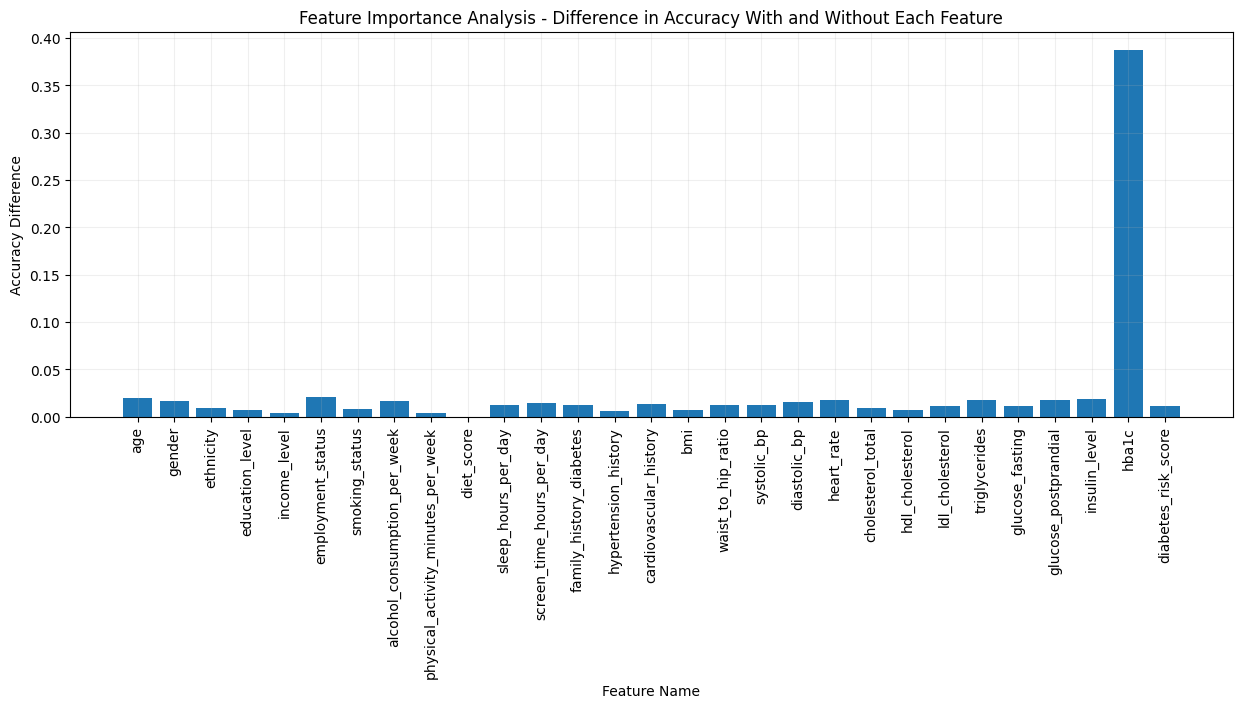

In [47]:
# plot a bar plot
feature_names = [X_sample.columns[feature] for feature in columns]
plt.figure(figsize=(15,5))
plt.bar(feature_names, difference_accuracy)
plt.title("Feature Importance Analysis - Difference in Accuracy With and Without Each Feature")
plt.xlabel("Feature Name")
plt.ylabel("Accuracy Difference")
plt.xticks(rotation=90)
plt.ylim(0, None)
plt.grid(alpha=0.2)
plt.show()

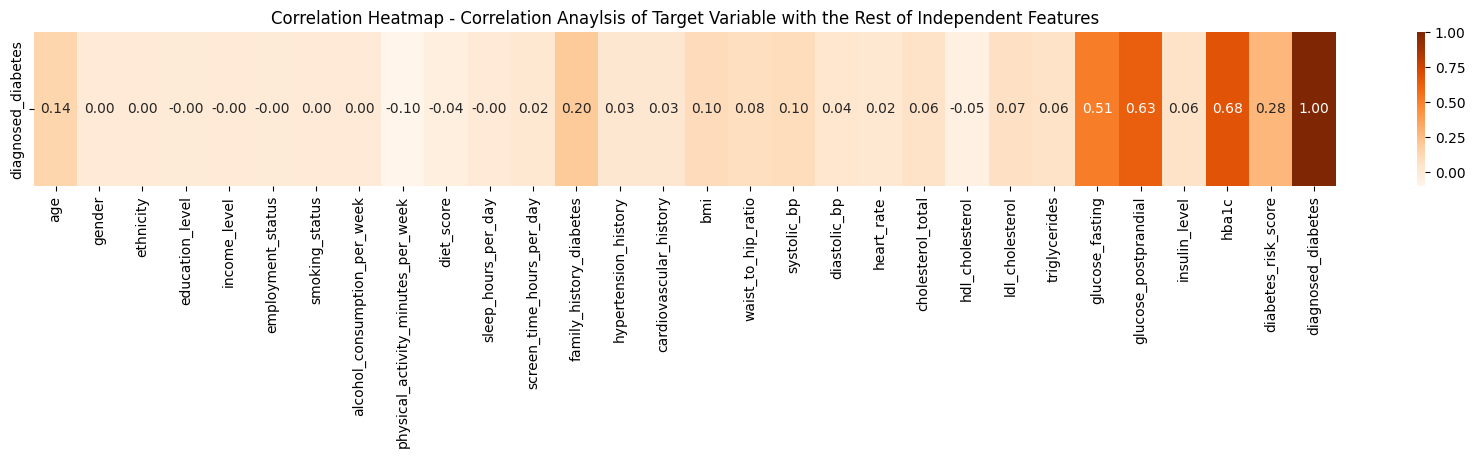

In [48]:
plt.figure(figsize=(21,2))
sns.heatmap(df_encoded.drop("diabetes_stage", axis=1).corr().loc[["diagnosed_diabetes"], :], annot=True, fmt=".2f", cmap="Oranges")
plt.title("Correlation Heatmap - Correlation Anaylsis of Target Variable with the Rest of Independent Features")
plt.show()

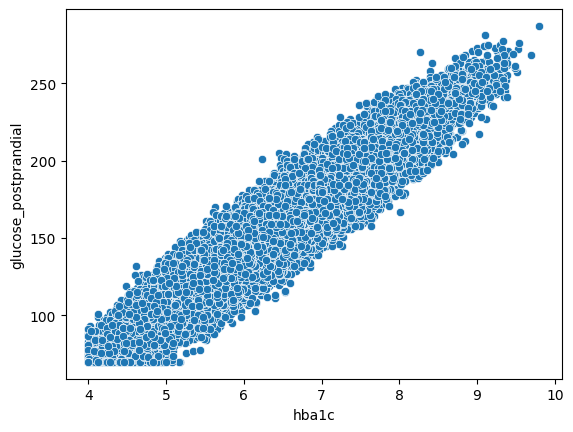

In [49]:
sns.scatterplot(x=df["hba1c"], y=df["glucose_postprandial"])
plt.show()

In [50]:
df_encoded.corr()[["hba1c"]].loc[["glucose_postprandial"],:]

hba1c
glucose_postprandial  0.933145

**Feature Importance Analysis:**
- **Each feature was removed and a new model with the same hyperparameters was trained without the removed feature. The new accuracy score was substracted from the previous best accuracy score of the model. The higher the difference the more important the model is. A normal train_test_split was followed instead of 5-fold cross validation.**
- **The bar graph represents the accuracy difference between a Decision Tree Classifier trained with and without the indicated feature. The higher the bar the more important the feature is, as a positive accuracy difference indicates that the model trained without the indicated feature had lower accuracy score.**
- **The majority of features express the same influence on the accuracy score except a few. For instance, *hba1c* feature displays the highest accuracy difference, more than 0.35. MedicinePlus under managment of the National Library of Medicine[1], defines hba1c as the Hemoglobin A1C test which measures the percentage of red blood cells having glucose-coated hemoglobin, eventually evaluating the average level of blood glucose over the past two to three months. This in return has a direct influence to the target variable. In fact, this is supported by the correlation heatmap above which shows that *hba1c* has a correlation score of 0.68, being the highest score.**
- **Interestingly, the same behavior is exhibited wih the *glucose_postprandial* feature in the correlation heatmap but opposite behavior in the bar graph. Both of the features share similar correlation values with the target variable, but the *glucose_postprandial* exhibited low feature importance during training. In fact, these two features are highly correlated scoring 0.933 in correlation. Having both of these features in the same model can have negative effects where the model can struggle to distinguish between individual effects. However, it did not harm this decision tree classifier due to the latter's ability at picking the best feature. Consequently, the *glucose_postprandial* had one of the least accuracy difference compared to the other features.**
- **The absence of family_history_diabetes decreased accuracy score by approximately 0.025. Furthermore, it had a 0.20 positive correlation with the target variable. Medically speaking, it is generally known that family_history_diabetes is an important indicator of having an educated guess if a patient has diabetes or not.**
- **There are a lot of features that have zero correlation with the heatmap. Despite all of these noisy and unecessary data, the decision tree models was able to perform well proving the robustness and resistance of this model to irrelevant features. This is can be inferred from the nature of this type of classifier since it already evaluates the importance of the features (using information gain) to build the classification tree.**

**Reference: [1]https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/**

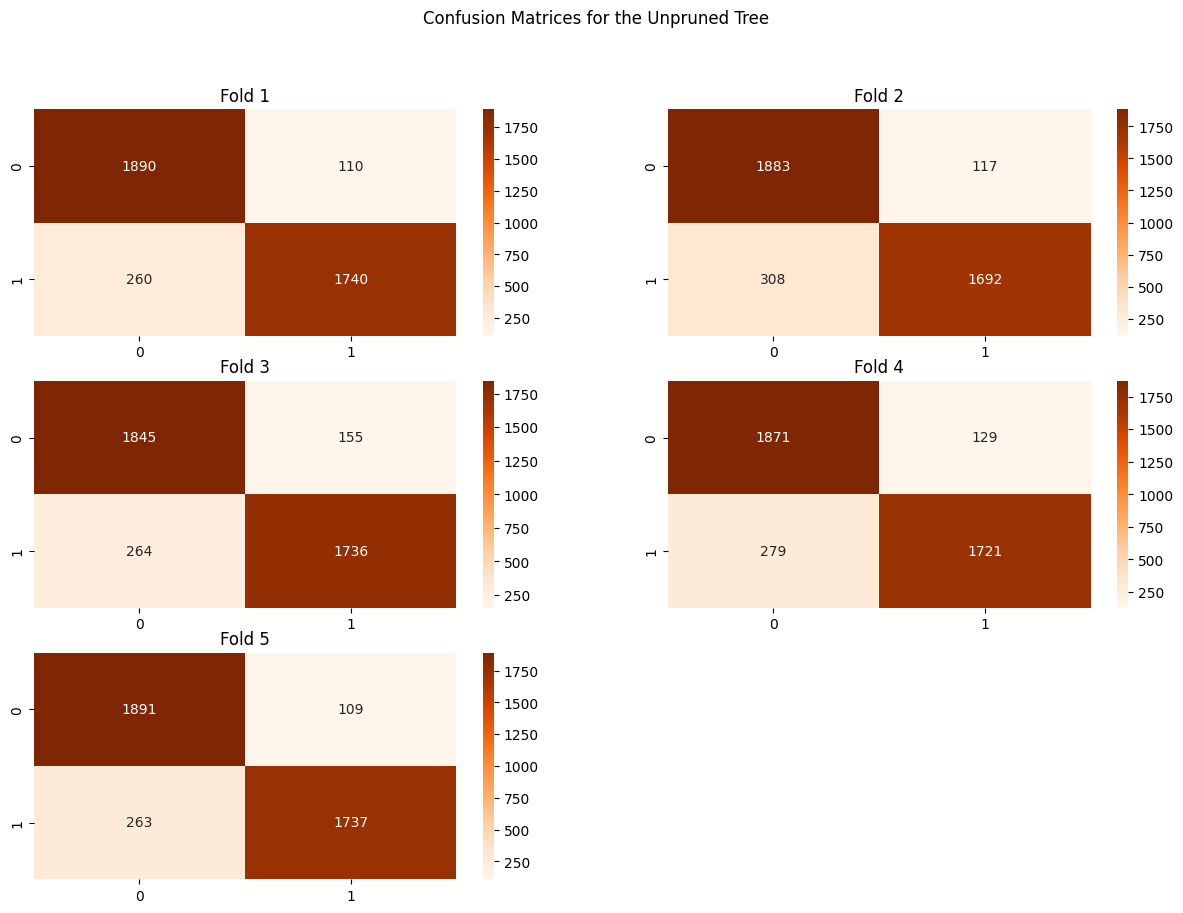

In [51]:
matrices_per_row = 2
n_folds = len(folds_filtered)
n_row = np.ceil(n_folds / matrices_per_row).astype(int)
fig, axes = plt.subplots(n_row, matrices_per_row, figsize=(15,10))
axes = axes.flatten()
for k, fold in enumerate(folds_filtered):
    ax = axes[k]
    sns.heatmap(
        confusion_matrix(fold["y_test"], fold["y_pred"]), 
        annot=True, 
        fmt="d", 
        cmap="Oranges",
        ax=ax
    )
    ax.set_title(f"Fold {k + 1}")

if(n_row % matrices_per_row != 0): #To remove unused subplots
    fig.delaxes(axes[n_folds])
fig.suptitle("Confusion Matrices for the Unpruned Tree")
plt.show()

- **The x-axis represents the predicted labels. The y-axis represents the actual labels.**
- **Fold 1 and Fold 5 exhibit similar behavior and have the fewest False Positives and False Negatives acorss all 5-fold of cross validation.**
- **In contrast, Fold 2, 3, and 4 exhibit similar behaviors yielding the worst scores across overall.**
- **Across all folds, False Positives were much higher than false negatives. There were about 264 false negatives except Fold 2 having the highest false positive, 308. False positives on the other hand, were much less reaching on average of 124 false negatives. This shows that the model predicts negative and positive cases well overall with a slight tendency to predict negative classes more accurately.**
- **In medical context, such as diabete predictions, false positives are generally favored than false negatives. This is because misclassiyfying a patient as diabetic is less harmful than misclassfiying a true diabetes case. In contrast, financially speaking, having less false positives is beneficial as they will avoid unecessary treatment costs.**

## **7**. PART 2: Pruning Decision Tree


### **a**. Pre-pruning


- Implement and train pre-pruning model using multiple setups and evaluate


In [52]:
print(model.max_depth_reached)

17


In [25]:
X_train_pre_pruned, X_test_pre_pruned, y_train_pre_pruned, y_test_pre_pruned = train_test_split(X_filtered, y_numpy, test_size=0.2, random_state=42)

In [53]:
# max depth
# min_samples_split
# information_gain threshold

# ADD TIME TESTING FOR EACH ALGORITHM
max_depth_values = [None, 5, 10, 15] #4
min_samples_split_values = [None, 25, 50, 100, 150, 200, 300] #7
min_gain_values = [None, 0.05, 0.1, 0.15, 0.2, 0.3] #6
purity_thresholds = [None, 0.95,0.97,0.99] #4

#672

combinations = list(itertools.product(max_depth_values, min_samples_split_values, min_gain_values, purity_thresholds))
accuracy_scores = []

time_per_combination = []
overall_time = time.time()

for index, (max_depth, min_samples_split, min_gain, purity_threshold) in enumerate(combinations):
    start_time = time.time()
    print(index, end =" -- ")
    if max_depth is None and min_samples_split is None and min_gain is None:
        continue
    model_pre_pruned = DecisionTreeClassifier(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_gain=min_gain, 
        mssd_alpha=best_alpha, 
        purity_threshold=purity_threshold
    )
    model_pre_pruned.fit(X_train_pre_pruned, y_train_pre_pruned)

    end_time = time.time()
    time_per_combination.append(end_time - start_time)
    
    accuracy_scores.append(classification_report(model_pre_pruned.predict(X_test_pre_pruned), y_test_pre_pruned, output_dict=True)["accuracy"])

overall_time = time.time() - overall_time

0 -- 1 -- 2 -- 3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- 15 -- 16 -- 17 -- 18 -- 19 -- 20 -- 21 -- 22 -- 23 -- 24 -- 25 -- 26 -- 27 -- 28 -- 29 -- 30 -- 31 -- 32 -- 33 -- 34 -- 35 -- 36 -- 37 -- 38 -- 39 -- 40 -- 41 -- 42 -- 43 -- 44 -- 45 -- 46 -- 47 -- 48 -- 49 -- 50 -- 51 -- 52 -- 53 -- 54 -- 55 -- 56 -- 57 -- 58 -- 59 -- 60 -- 61 -- 62 -- 63 -- 64 -- 65 -- 66 -- 67 -- 68 -- 69 -- 70 -- 71 -- 72 -- 73 -- 74 -- 75 -- 76 -- 77 -- 78 -- 79 -- 80 -- 81 -- 82 -- 83 -- 84 -- 85 -- 86 -- 87 -- 88 -- 89 -- 90 -- 91 -- 92 -- 93 -- 94 -- 95 -- 96 -- 97 -- 98 -- 99 -- 100 -- 101 -- 102 -- 103 -- 104 -- 105 -- 106 -- 107 -- 108 -- 109 -- 110 -- 111 -- 112 -- 113 -- 114 -- 115 -- 116 -- 117 -- 118 -- 119 -- 120 -- 121 -- 122 -- 123 -- 124 -- 125 -- 126 -- 127 -- 128 -- 129 -- 130 -- 131 -- 132 -- 133 -- 134 -- 135 -- 136 -- 137 -- 138 -- 139 -- 140 -- 141 -- 142 -- 143 -- 144 -- 145 -- 146 -- 147 -- 148 -- 149 -- 150 -- 151 -- 152 -- 153 -- 154 -- 155 -- 156 -- 157 -- 158 

In [55]:
print(f"The best hyperparameter combination is: {combinations[np.argmax(accuracy_scores)]} with an accuracy score of: {np.max(accuracy_scores)}")
print(f"The worst hyperparameter combination is: {combinations[np.argmin(accuracy_scores)]} with an accuracy score of: {np.min(accuracy_scores)}")

The best hyperparameter combination is: (None, 300, 0.3, None) with an accuracy score of: 0.9325
The worst hyperparameter combination is: (10, 300, 0.3, None) with an accuracy score of: 0.91075


- **The best combination values of max_depth, min_samples, min_gain, and purity_threshold are (None, 300, 0.3, None) yielding an accuracy score of 0.9305, an increase of 2.47% from the previous score (0.9075). Allowing unlimited tree debpth improves model's performance consequently increasing accuracy score as more splits will be applied. However, it increases the risk of overfitting and loss of generalizability. However, this can be mitigated by having a high optimized minimum number of samples (300 in this best case) to allow pre-pruning and prevent the tree from creating splits stemming from not well-supported and sufficient data. Furthermore, a minimum gain value of 0.3 enforces statistically significant features to be included in classification increasing model reliability and complexity.**
- **The worst combination values however are (10, 300, 0.3, None) for max_depth, min_samples_split, and min_gain with an accuracy of 0.906 which was slightly less than the no-pruned model. According to this combination, the main problem of this pre-pruned model was the excessive reducation of model complexity and uncontrolled reliability on common label values. This in return hindered the model's ability to learn the patterns instilled in the data as good as the rest of the models. A high of value 10 max depth and 300 min samples per split renders an inadequate model compared to the rest. Surprisingly, it is still considered as a good accuracy score model.**
- **The absence of both purity_threshold and max_depth yielded better scores than their inclusion. This suggests that introducing constraints on tree depth and node purity restrics the model's ability to capture more complex patterns and hinder the tree's flexibility to grow and split more dynamically.**

In [26]:
best_max_depth, best_min_samples_split, best_min_gain, best_purity_threshold = (None, 300, 0.3, None)
best_pre_pruning_model = DecisionTreeClassifier(
        max_depth=best_max_depth, 
        min_samples_split=best_min_samples_split, 
        min_gain=best_min_gain, 
        mssd_alpha=best_alpha, 
        purity_threshold=best_purity_threshold
    )
best_pre_pruning_model.fit(X_train_pre_pruned, y_train_pre_pruned)
y_pred_best_pre_pruned = best_pre_pruning_model.predict(X_test_pre_pruned)
best_report_pre_pruned = classification_report(y_pred_best_pre_pruned, y_test_pre_pruned, output_dict=True)
print(classification_report(y_pred_best_pre_pruned, y_test_pre_pruned))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2275
           1       0.85      1.00      0.92      1725

    accuracy                           0.93      4000
   macro avg       0.93      0.94      0.93      4000
weighted avg       0.94      0.93      0.93      4000



### **b**. Post-pruning


- Split data (60/20/20)
- Apply post-pruning algorithm using validation set
- Track pruning iterations and accuracy changes
- Evaluate post-pruning model and compare
- List pruned features and compare&discuss results

In [27]:
# Splitting data (60/20/20)
X_train_post_pruned, X_test_post_pruned, y_train_post_pruned, y_test_post_pruned = train_test_split(X_filtered, y_numpy, test_size=0.2, random_state=42) # -> X_test 0.2 and X_train = 0.8
X_train_post_pruned, X_valid_post_pruned, y_train_post_pruned, y_valid_post_pruned = train_test_split(X_train_post_pruned, y_train_post_pruned, test_size=0.25, random_state=42) # -> X_valid 0.8 * 0.25 = 0.2 and X_train 0.8 * 0.75 = 0.6

In [59]:
post_pruning_model = DecisionTreeClassifier(mssd_alpha=10)
post_pruning_model.fit(X_train_post_pruned, y_train_post_pruned)

print(f"The testing accuracy score of the unpruned model: {classification_report(post_pruning_model.predict(X_test_post_pruned), y_test_post_pruned, output_dict=True)["accuracy"]}")
print()

last_accuracy = classification_report(post_pruning_model.predict(X_valid_post_pruned), y_valid_post_pruned, output_dict=True)["accuracy"]
pruning_features, accuracies_post_pruned, n_nodes, time_post_pruned = post_pruning_model.post_pruning(X_valid_post_pruned, y_valid_post_pruned, last_accuracy)
print()

y_pred_post_pruned = post_pruning_model.predict(X_test_post_pruned)
post_pruned_report = classification_report(y_pred_post_pruned, y_test_post_pruned, output_dict=True)
print(f"The testing accuracy score of the post-pruned model: {post_pruned_report["accuracy"]}")

The testing accuracy score of the unpruned model: 0.89225

Sucessfull Pruning Number 0 with accuracy score 0.906.
Sucessfull Pruning Number 1 with accuracy score 0.906.
Sucessfull Pruning Number 2 with accuracy score 0.90625.
Sucessfull Pruning Number 3 with accuracy score 0.907.
Sucessfull Pruning Number 4 with accuracy score 0.907.
Sucessfull Pruning Number 5 with accuracy score 0.907.
Sucessfull Pruning Number 6 with accuracy score 0.907.
Sucessfull Pruning Number 7 with accuracy score 0.907.
Sucessfull Pruning Number 8 with accuracy score 0.907.
Sucessfull Pruning Number 9 with accuracy score 0.907.
Sucessfull Pruning Number 10 with accuracy score 0.907.
Sucessfull Pruning Number 11 with accuracy score 0.907.
Sucessfull Pruning Number 12 with accuracy score 0.907.
Sucessfull Pruning Number 13 with accuracy score 0.907.
Sucessfull Pruning Number 14 with accuracy score 0.907.
Sucessfull Pruning Number 15 with accuracy score 0.90725.
Sucessfull Pruning Number 16 with accuracy score 0.

In [29]:
pruning_features_str = [X_sample.drop(columns=["diabetes_stage"]).columns[feature] for feature in pruning_features]
pruning_features_str

['hba1c',
 'waist_to_hip_ratio',
 'ethnicity',
 'education_level',
 'employment_status',
 'waist_to_hip_ratio',
 'diet_score',
 'ethnicity',
 'ethnicity',
 'diastolic_bp',
 'ethnicity',
 'smoking_status',
 'sleep_hours_per_day',
 'diastolic_bp',
 'glucose_postprandial',
 'waist_to_hip_ratio',
 'waist_to_hip_ratio',
 'ethnicity',
 'gender',
 'employment_status',
 'age',
 'gender',
 'waist_to_hip_ratio',
 'sleep_hours_per_day',
 'waist_to_hip_ratio',
 'age',
 'age',
 'physical_activity_minutes_per_week',
 'sleep_hours_per_day',
 'waist_to_hip_ratio',
 'age',
 'hba1c',
 'age',
 'age',
 'age',
 'employment_status',
 'waist_to_hip_ratio',
 'age',
 'age',
 'gender',
 'age',
 'age',
 'age',
 'education_level',
 'age',
 'age',
 'age',
 'age',
 'age',
 'physical_activity_minutes_per_week',
 'age',
 'age',
 'physical_activity_minutes_per_week',
 'age',
 'age',
 'ethnicity',
 'age',
 'age',
 'age',
 'employment_status',
 'waist_to_hip_ratio',
 'age',
 'ethnicity',
 'smoking_status',
 'age',
 'age

- **During post-pruning, the removal of twigs lead to sublte increases in accuracy scores on each iteration. After 109 post-pruning iterations, the validation accuracy score increased from 0.906 to 0.9105, representng a 0.49% increase. On the testing data, the model accuracy score had a small improvement from 0.89225 to 0.89625, an increase of 0.45%. The drop in accuracy after the final iteration demonstrates that further purning leads to the removal of meaningful predictive information instead of eliminating noisy data. While the post-pruning technique led to minor improvements, the pre-pruning technique led to a more compact and interperatable model performing more consistently on unseen data.**
- **Interestingly, a lot of the low-correlated features with the target variable, such as *ethnicity* and *sleep_hours_per_day*,  filled the twigs part of the decision tree classifier indicating that the model was using the high-correlated features for practical and heavier splits and using low-correlated features for find-grained splits to capture minor variations in data. In fact, all of this explains the minor increase in accuracy score after post-pruning as these low-correlated features have low to no correlation and effect on the target variable.**

## 8. Visualizations


- Confusion matrices for each fold
- Metrics comparison bar charts
- Box plots for metrics across folds
- Feature importance charts
- Tree structure before/after pruning
- Pruning progression and node count visualization

- **The confusion matrices were displayed above and discussions were provided. However, to follow the assignment format, the confusion matrices are provided below but without any disucssion.**
- **Feature importance graphs were also displayed above along with discussions as they were asked to be included in part 6. They were also provided in the Visualizations section to follow the assignment format.**

**All model names:**
- **post_pruning_model**
- **best_pre_pruning_model**
- **best_model**

#### Confusion Matrices for each fold

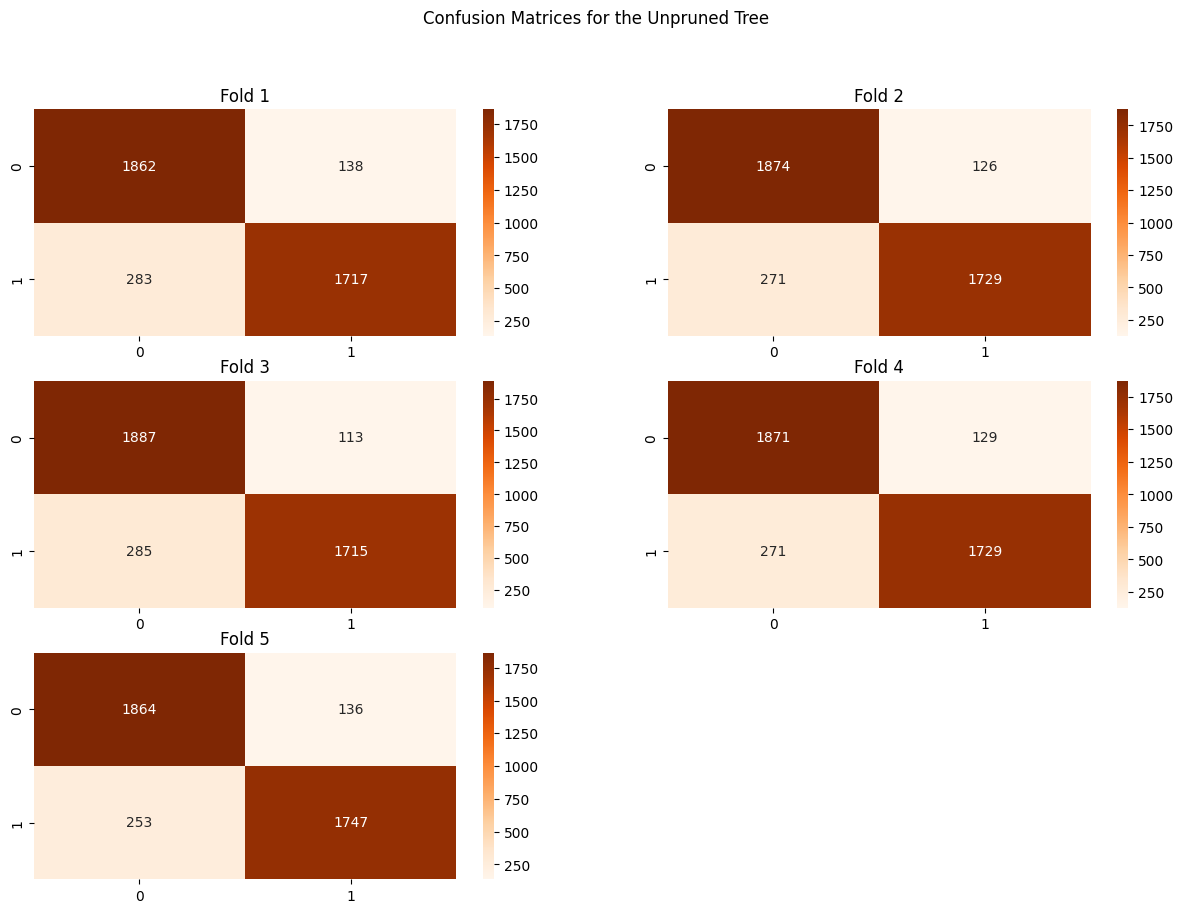

In [35]:
# Confusion Matrices for unpruned with best alpha and without diabetes_stage feature 5-fold cross validation
matrices_per_row = 2
n_folds = len(folds_filtered)
n_row = np.ceil(n_folds / matrices_per_row).astype(int)
fig, axes = plt.subplots(n_row, matrices_per_row, figsize=(15,10))
axes = axes.flatten()
for k, fold in enumerate(folds_filtered):
    ax = axes[k]
    sns.heatmap(
        confusion_matrix(fold["y_test"], fold["y_pred"]), 
        annot=True, 
        fmt="d", 
        cmap="Oranges",
        ax=ax
    )
    ax.set_title(f"Fold {k + 1}")

if(n_folds % matrices_per_row != 0): #To remove unused subplots
    fig.delaxes(axes[n_folds])
fig.suptitle("Confusion Matrices for the Unpruned Tree")
plt.show()

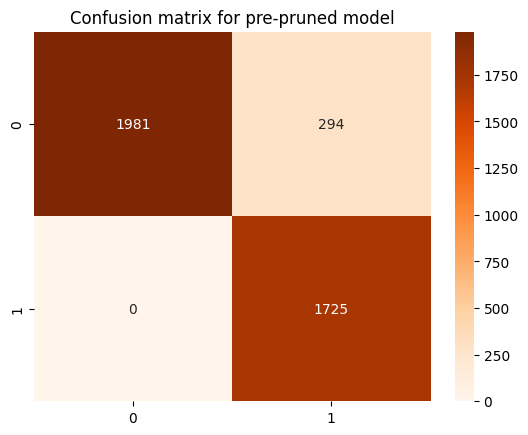

In [36]:
# Confusion matrix for pre-pruned model with best pre-pruning hyperparameters
sns.heatmap(
        confusion_matrix(y_pred_best_pre_pruned, y_test_pre_pruned), 
        annot=True, 
        fmt="d", 
        cmap="Oranges",
    )
plt.title("Confusion matrix for pre-pruned model")
plt.show()

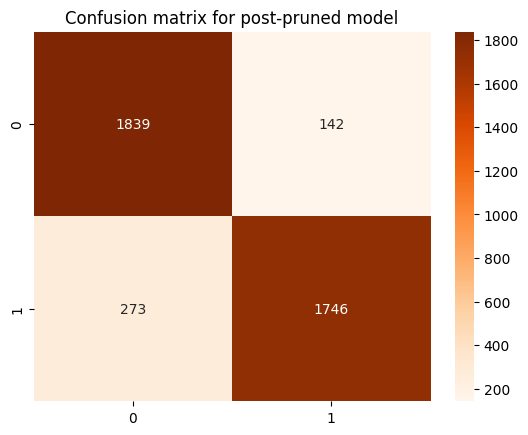

In [37]:
# Confusion matrix for post-pruned model
sns.heatmap(
        confusion_matrix(y_test_post_pruned, y_pred_post_pruned), 
        annot=True, 
        fmt="d", 
        cmap="Oranges",
    )
plt.title("Confusion matrix for post-pruned model")
plt.show()

#### Metrics comparison bar charts

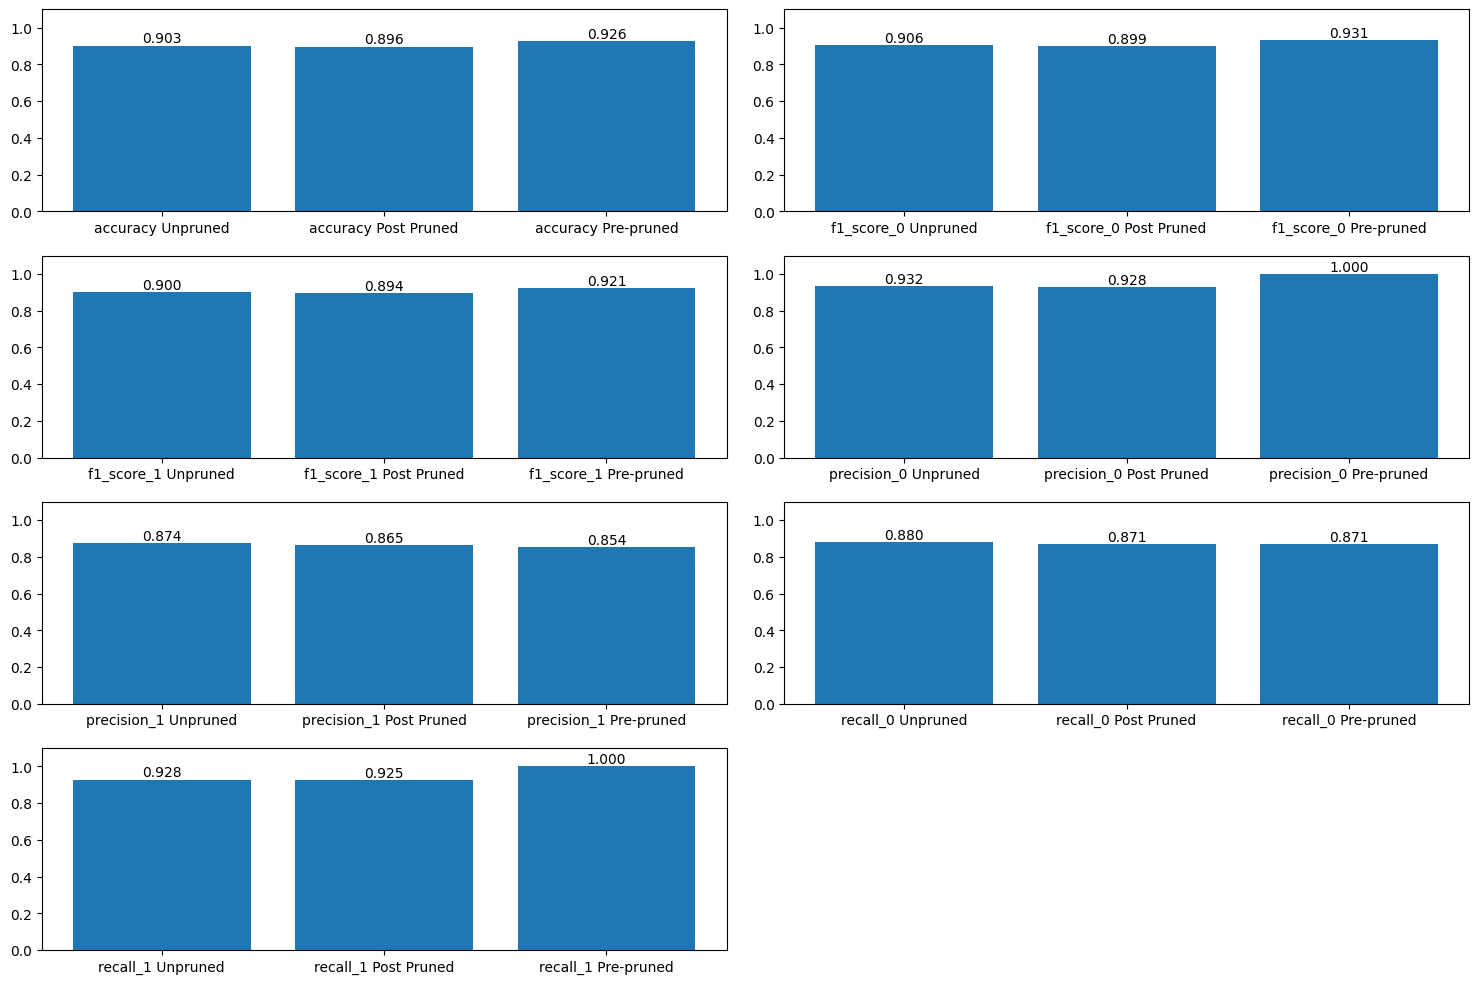

In [38]:
# Bar Charts for metrics

metrics = {
    "accuracy":[best_fold["report"]["accuracy"], post_pruned_report["accuracy"], best_report_pre_pruned["accuracy"]],
    "f1_score_0": [best_fold["report"]["0"]["f1-score"], post_pruned_report["0"]["f1-score"], best_report_pre_pruned["0"]["f1-score"]],
    "f1_score_1": [best_fold["report"]["1"]["f1-score"], post_pruned_report["1"]["f1-score"], best_report_pre_pruned["1"]["f1-score"]],
    "precision_0":[best_fold["report"]["0"]["precision"], post_pruned_report["0"]["precision"], best_report_pre_pruned["0"]["precision"]],
    "precision_1":[best_fold["report"]["1"]["precision"], post_pruned_report["1"]["precision"], best_report_pre_pruned["1"]["precision"]],
    "recall_0":[best_fold["report"]["0"]["recall"], post_pruned_report["0"]["recall"], best_report_pre_pruned["0"]["recall"]],
    "recall_1":[best_fold["report"]["1"]["recall"], post_pruned_report["1"]["recall"], best_report_pre_pruned["1"]["recall"]],
}
titles = ["Unpruned", "Post Pruned", "Pre-pruned"]

bar_per_row = 2
n_row = np.ceil(len(metrics) / bar_per_row).astype(int)
fig, axes = plt.subplots(n_row, bar_per_row, figsize=(15,10))
axes = axes.flatten()
fig.tight_layout()
for index, metric in enumerate(metrics):
    ax = axes[index]
    categories = [f"{metric} {title}" for title in titles]
    bars = ax.bar(categories, metrics[metric])
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,                             
            f'{height:.3f}',                        
            ha='center', va='bottom'       
        )
    ax.set_ylim(0, 1.1) 
    
if(len(metrics) % bar_per_row != 0):
    fig.delaxes(axes[len(metrics)])

plt.show()

#### Boxplots for metrics across folds

In [39]:
accuracy_across_folds = [fold["report"]["accuracy"] for fold in folds_filtered]

precision_0_across_folds = [fold["report"]["0"]["precision"] for fold in folds_filtered]
precision_1_across_folds = [fold["report"]["1"]["precision"] for fold in folds_filtered]

recall_0_across_folds = [fold["report"]["0"]["recall"] for fold in folds_filtered]
recall_1_across_folds = [fold["report"]["1"]["recall"] for fold in folds_filtered]

f1_0_across_folds = [fold["report"]["0"]["f1-score"] for fold in folds_filtered]
f1_1_across_folds = [fold["report"]["1"]["f1-score"] for fold in folds_filtered]

data = [accuracy_across_folds, precision_0_across_folds, precision_1_across_folds, recall_0_across_folds, recall_1_across_folds, f1_0_across_folds, f1_1_across_folds]
# 7

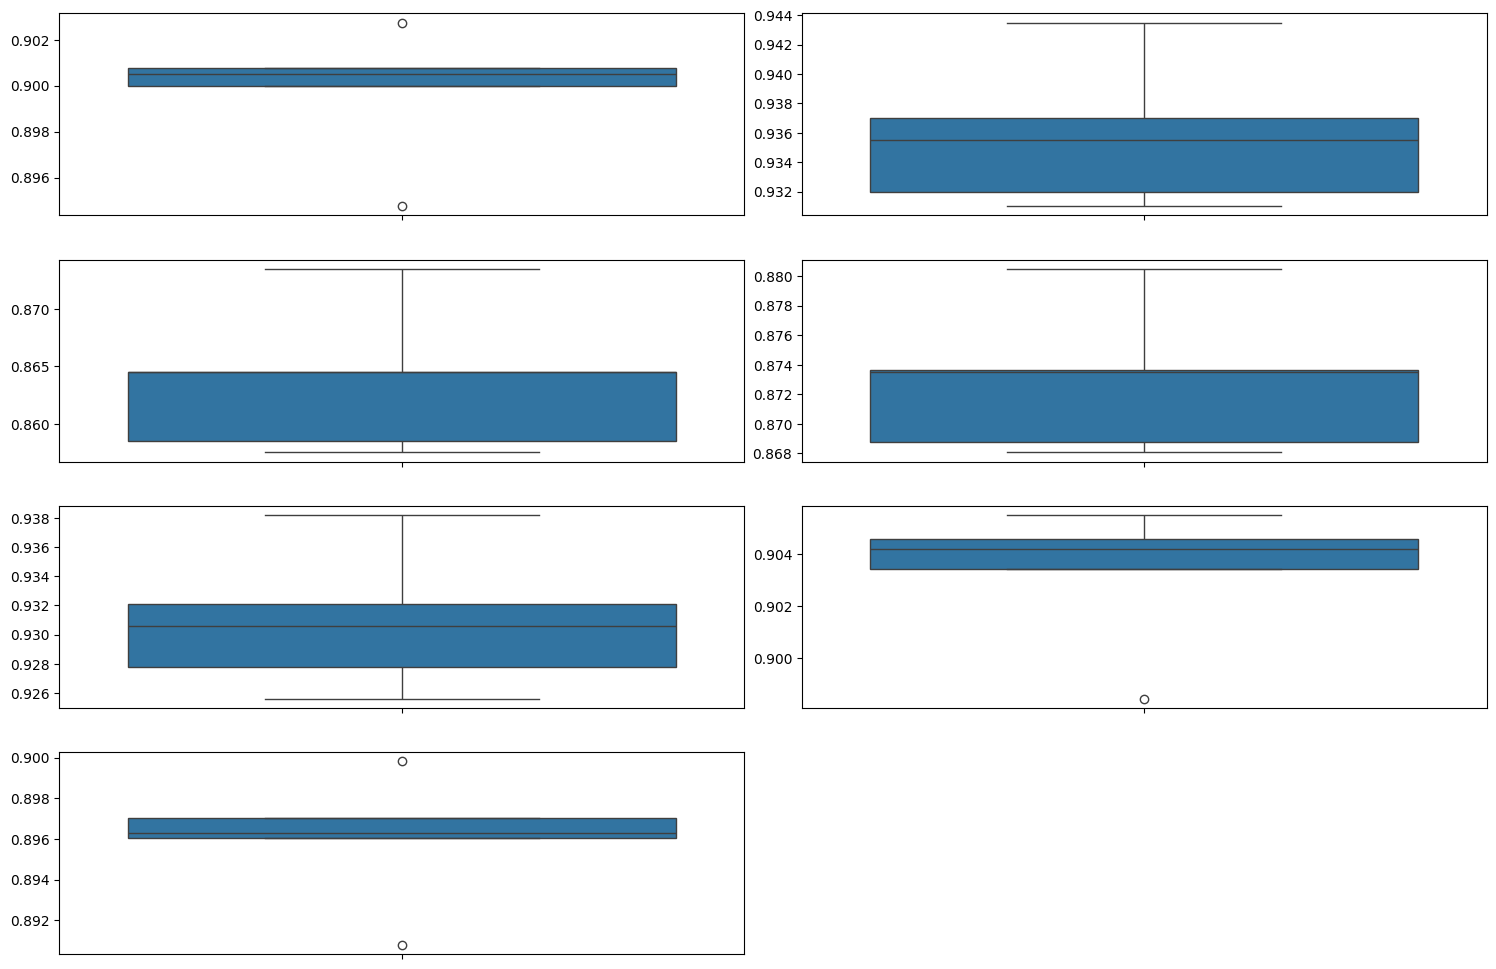

In [40]:
box_per_row = 2
n_row = np.ceil(len(data) / box_per_row).astype(int)
fig, axes = plt.subplots(n_row, box_per_row, figsize=(15,10))
axes = axes.flatten()
fig.tight_layout()
for index in range(len(data)):
    ax = axes[index]
    sns.boxplot(data=data[index], ax=ax)
    
if(len(metrics) % box_per_row != 0):
    fig.delaxes(axes[len(metrics)])

plt.show()

#### Feature importance charts

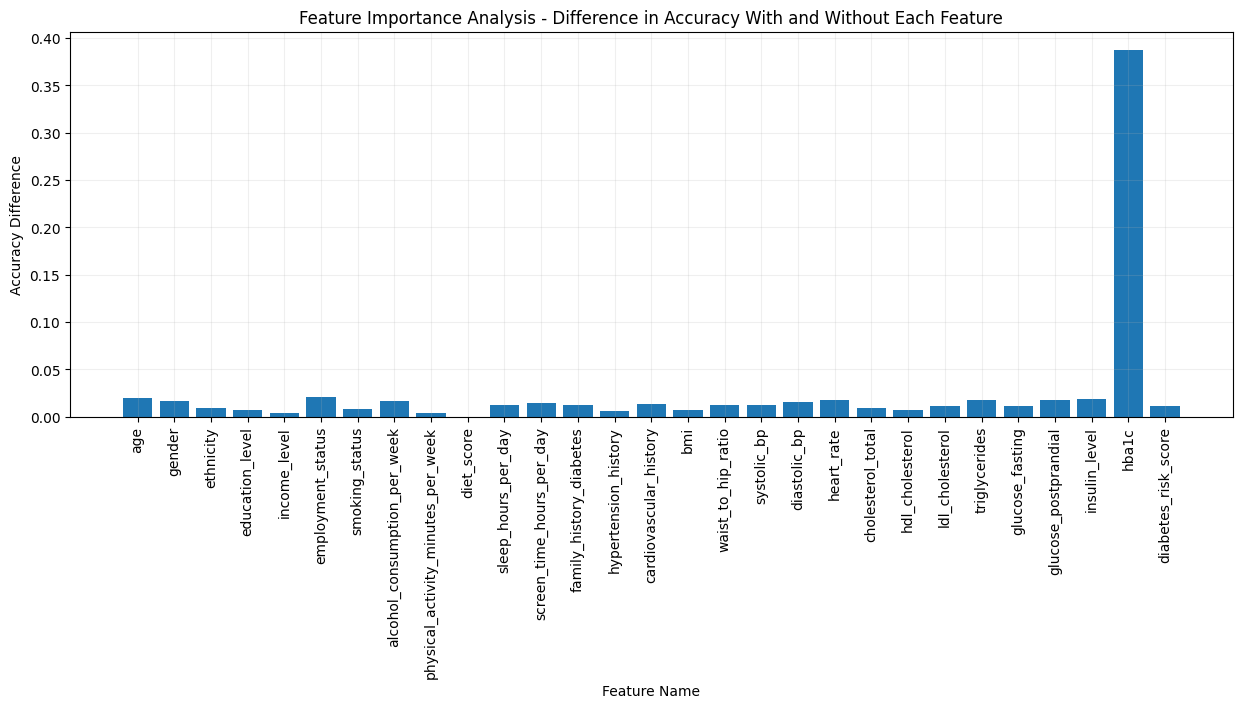

In [67]:
# plot a bar plot
feature_names = [X_sample.columns[feature] for feature in columns]
plt.figure(figsize=(15,5))
plt.bar(feature_names, difference_accuracy)
plt.title("Feature Importance Analysis - Difference in Accuracy With and Without Each Feature")
plt.xlabel("Feature Name")
plt.ylabel("Accuracy Difference")
plt.xticks(rotation=90)
plt.ylim(0, None)
plt.grid(alpha=0.2)
plt.show()

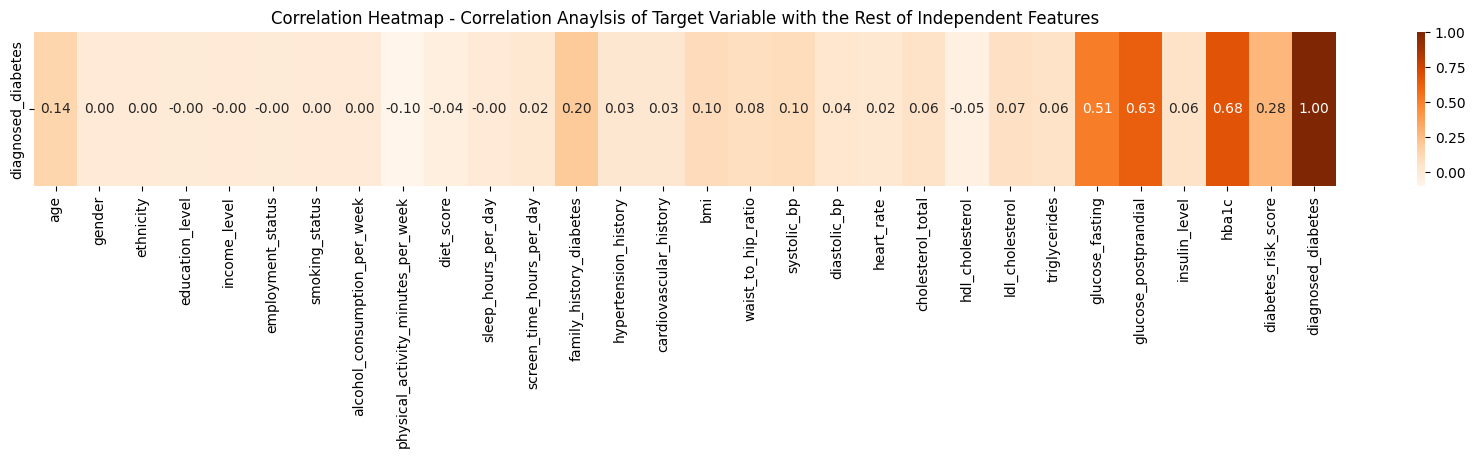

In [68]:
plt.figure(figsize=(21,2))
sns.heatmap(df_encoded.drop("diabetes_stage", axis=1).corr().loc[["diagnosed_diabetes"], :], annot=True, fmt=".2f", cmap="Oranges")
plt.title("Correlation Heatmap - Correlation Anaylsis of Target Variable with the Rest of Independent Features")
plt.show()

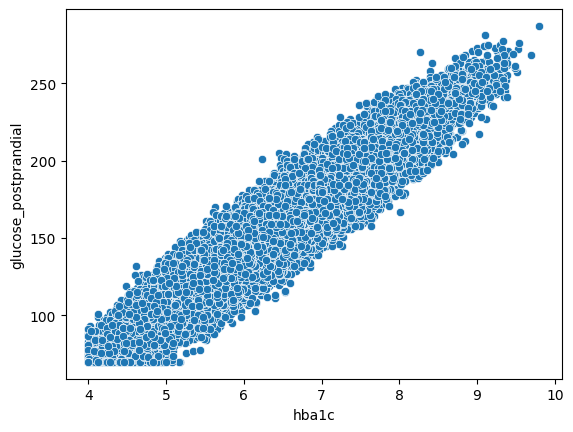

In [69]:
sns.scatterplot(x=df["hba1c"], y=df["glucose_postprandial"])
plt.show()

#### Tree Structure

In [41]:
# Unpruned Tree Structure
best_model.plot_tree(X_sample.columns)

| --- hba1c < 6.495
|   | --- family_history_diabetes = 0.0
|   |   | --- waist_to_hip_ratio < 0.845
|   |   |   | --- hba1c < 6.195
|   |   |   |   | --- employment_status = 0.0
|   |   |   |   |   | --- ethnicity = 0.0
|   |   |   |   |   |   | --- alcohol_consumption_per_week = 0.0
|   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   | --- alcohol_consumption_per_week = 1.0
|   |   |   |   |   |   |   | --- income_level = 0.0
|   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   | --- income_level = 1.0
|   |   |   |   |   |   |   |   | --- age = 35.0
|   |   |   |   |   |   |   |   |   | --- leaf: [1]
|   |   |   |   |   |   |   |   | --- age = 37.0
|   |   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   | --- income_level = 2.0
|   |   |   |   |   |   |   |   | --- age = 29.0
|   |   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   |   | --- age = 52.0
|   |   |   |   |   |   |   |   |   | --- leaf

In [42]:
# Pre-Pruned Tree Structure
best_pre_pruning_model.plot_tree(X_sample.drop("diabetes_stage", axis=1).columns)

| --- hba1c < 6.495
|   | --- leaf: [0]
| --- hba1c >= 6.495
|   | --- leaf: [1]


In [43]:
# Post-Pruned Tree Structure
post_pruning_model.plot_tree(X_sample.drop("diabetes_stage",axis=1).columns)

| --- hba1c < 6.495
|   | --- family_history_diabetes = 0.0
|   |   | --- hba1c < 6.175
|   |   |   | --- alcohol_consumption_per_week = 0.0
|   |   |   |   | --- waist_to_hip_ratio < 0.855
|   |   |   |   |   | --- hba1c < 6.025
|   |   |   |   |   |   | --- employment_status = 0.0
|   |   |   |   |   |   |   | --- hypertension_history = 0.0
|   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   | --- hypertension_history = 1.0
|   |   |   |   |   |   |   |   | --- education_level = 1.0
|   |   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   |   | --- education_level = 2.0
|   |   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   |   | --- education_level = 3.0
|   |   |   |   |   |   |   |   |   | --- leaf: [1]
|   |   |   |   |   |   | --- employment_status = 1.0
|   |   |   |   |   |   |   | --- income_level = 0.0
|   |   |   |   |   |   |   |   | --- leaf: [0]
|   |   |   |   |   |   |   | --- income_level = 1.0
| 

#### Pruning progression and node count visualization

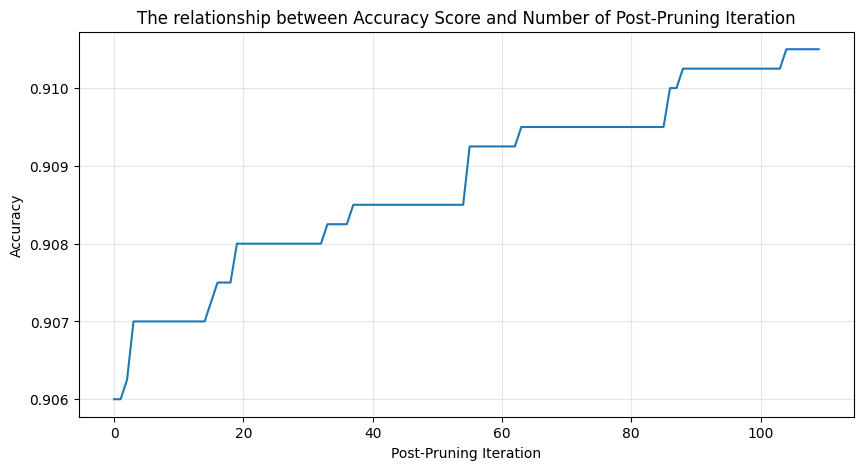

In [49]:
# Visualize Accuracy
plt.figure(figsize=(10,5))
sns.lineplot(x=accuracies_post_pruned.keys(), y=accuracies_post_pruned.values())
plt.grid(True, alpha=0.3, zorder=0)
plt.title("The relationship between Accuracy Score and Number of Post-Pruning Iteration")
plt.xlabel("Post-Pruning Iteration")
plt.ylabel("Accuracy")
plt.show()

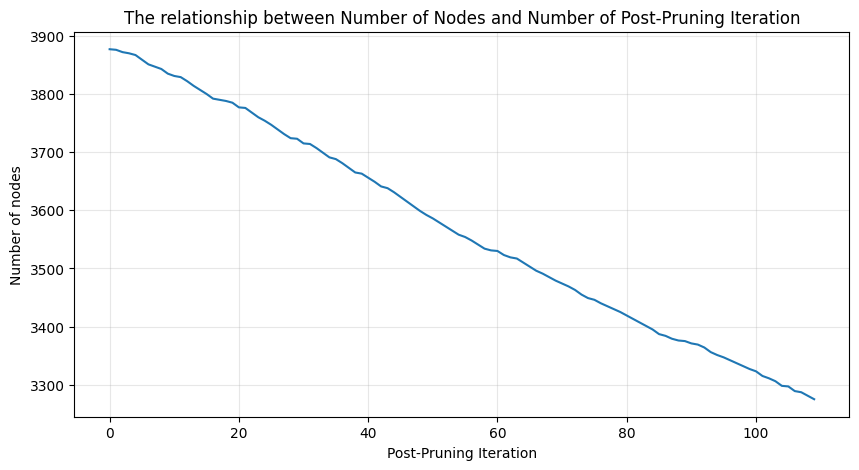

In [50]:
# Visualize Accuracy
plt.figure(figsize=(10,5))
sns.lineplot(x=n_nodes.keys(), y=n_nodes.values())
plt.grid(True, alpha=0.3, zorder=0)
plt.title("The relationship between Number of Nodes and Number of Post-Pruning Iteration")
plt.xlabel("Post-Pruning Iteration")
plt.ylabel("Number of nodes")
plt.show()

## 9. Results Tables


- Part 1: Model variations (Accuracy, Precision, Recall, F1)
- Part 2: Pre vs Post Pruning metrics
- Model complexity and training time comparison

#### Part 1: Model variations (Accuracy, Precision, Recall, F1)

In [51]:
# Unpruned
for fold in folds_filtered:
    print(classification_report(fold["y_pred"], fold["y_test"]))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2145
           1       0.86      0.93      0.89      1855

    accuracy                           0.89      4000
   macro avg       0.89      0.90      0.89      4000
weighted avg       0.90      0.89      0.89      4000

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2145
           1       0.86      0.93      0.90      1855

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2172
           1       0.86      0.94      0.90      1828

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000

              preci

In [76]:
results_table.style.set_caption("Result Table to Compare Scores due to Variation in Alpha Values")

#### Part 2: Pre vs Post Pruning metrics

In [52]:
# Pre pruning metrics
best_report_pre_pruned

{'0': {'precision': 1.0,
  'recall': 0.8707692307692307,
  'f1-score': 0.930921052631579,
  'support': 2275.0},
 '1': {'precision': 0.8543833580980683,
  'recall': 1.0,
  'f1-score': 0.9214743589743589,
  'support': 1725.0},
 'accuracy': 0.9265,
 'macro avg': {'precision': 0.9271916790490342,
  'recall': 0.9353846153846154,
  'f1-score': 0.9261977058029689,
  'support': 4000.0},
 'weighted avg': {'precision': 0.937202823179792,
  'recall': 0.9265,
  'f1-score': 0.9268471659919028,
  'support': 4000.0}}

In [53]:
# Post pruning metrics
print(classification_report(y_pred_post_pruned, y_test_post_pruned))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2112
           1       0.86      0.92      0.89      1888

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



#### Model complexity and training time comparison

**The table below shows Time complexities of the methods related to tree training.**

| Method                   | Time Complexity                                                       | Space Complexity                           |
|--------------------------|-----------------------------------------------------------------------|--------------------------------------------|
| **Entropy**              | *O(n_samples + n_unique_feature_value)*                               | *O(n_unique_feature_value)*                |
| **information_gain**     | O(n_samples*log(n_samples))                                           | *O(n_unique_feature_value)*                |
| **split**                | *O(n_samples\*log(n_samples)) + O(n_samples \* n_unique_feature_value)* for categorical. <br />*O(n_samples)* for continuous features.       | *O(n_samples + n_unique_feature_value)* for boolean array creation for continuous features.                        |
| **mssd**                 | *O(n_unique_feature_value)*                                           | *O(1)*                                     |
| **mssd_selection**       | *O(n_unique_feature_value)*                                           | *O(n_thresholds + n_unique_feature_value)* |
| **feature_type**         | *O(n_samples \* log(n_samples))* if feature indices were not given as input. <br /> *O(n_features)* if feature indices were given as input.                                                                               |                                            |
| **get_leaf_values**      | *O(n_samples)*                                                        |                                            |
| **best_feature**         | *O(n_features \* n_samples \* log(n_samples))* if categorical. <br /> *O(n_features) \* [O(n_unique_feature_value) + O(n_thresholds)*                                                                                   | *O(1)*                                     |
| **grow**                 | *O(n_features \* n_thresholds \* $\sum_{nodes} n_i$)*                 | $\sum_{nodes} n_i$                         |

$\sum_{nodes} n_i$ = *O(n_samples \* log(n_samples))*

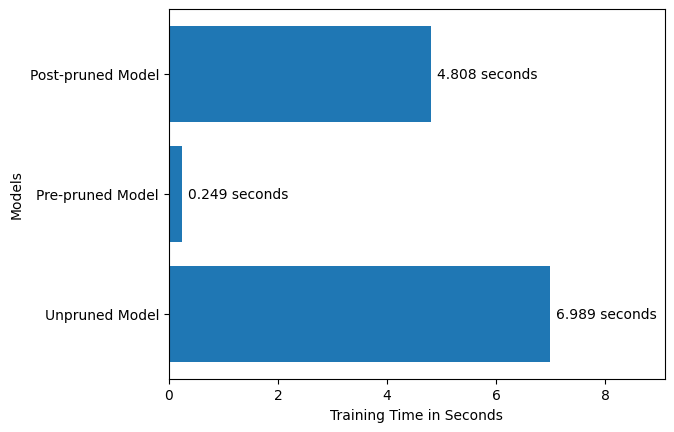

In [61]:
training_times = {
    "Unpruned Model":best_model.training_time, 
    "Pre-pruned Model":best_pre_pruning_model.training_time,
    "Post-pruned Model":post_pruning_model.training_time
}

bars = plt.barh(list(training_times.keys()), list(training_times.values()))
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.3f} seconds",
        va="center"
    )

plt.margins(x=0.3)
plt.ylabel("Models")
plt.xlabel("Training Time in Seconds")
plt.show()

In [68]:
print(f"The post pruning time is: {time_post_pruned:.3f} seconds. The total time for the having a post-pruned model is: {time_post_pruned + post_pruning_model.training_time:.3f}")

The post pruning time is: 3.491 seconds. The total time for the having a post-pruned model is: 8.299


## 10. Discussion & Analysis


- Discuss hyperparameter effects and threshold strategies
- Analyze pruning effectiveness
- Discuss trade-offs: complexity vs performance
- Limitations and overall insights

- **The optimization of hyperparameters and threshold strategies plays a critical role on building a powerful Decison Tree Classifier. The optimal values can easily be chosen through trial and error. In this assignment, the approach was to aggregate different values of each hyperparamter in a single combination set and evaluate the performance based on known classification metrics: accuracy, precision, recall, and f1. Unrestricted and not well-regularized decision trees yielded high training score (1.0) and much lower testing scores (0.89 to 0.91). While the model implemented in this assignment did not suffer from excessive overfitting, meaningful improvements resulted from regularizing the hyperparamteres of the model.**
- **In the implemented model, there was a positive relationship between the accuracy score of the trained model and the MSSD Alpha value. This means that the smoother and stable the splits in continuous features are, the more consistent the model is. Aside from this, the bar graphs in Section 8 supports the above claims where the majority of the scores for the unpruned model were less than the pruned models except for recall_0 and precision_1. The unpruned accuracy model had a score of 0.907 while the pre-pruned and post-pruned had 0.927 and 0.909 respectively. The 0 label were easily and effectively recognized in the pruned models than the unpruned model where the least score was from the unpruned, 0.945. This shows that moderate regurlization with the right hyperparamter combination improved predictive performance without adding an excessive layer of contraints.**
- **Furthermore, pre pruning was the best scoring and fastest model. In fact, it was able to be trained in 0.862 seconds while the post pruned and unpruned finished fitting the data in approximately 4.808 and 7 seconds respectively. It is worth mentioning that the whole post-pruning process (training + twigs removal) took 8.299 seconds. While the difference in performance between unpruned and pruned is obvious, there was a difference also between pre-pruned and post-pruned models. Despite both leading to improvement, post-pruned model only led to minor increases in classification metrics. This is due to the model's ability on prioritizing highly correlated and important models and throwing off the rest at the end of the tree making them as twigs. However, post-pruned techniuqe is effective at removing twigs. This is demonstrated in the number of nodes graph in Section 8, where the post pruning technique removed about 700 nodes. However, while removing these twigs is beneficial and noticeable, a major improvement is not to be expected. Deleting low correlated features before training along with applying twig removal post-pruning technique might lead to more imporvement percentage. This demonstrates that pre-pruning sets structural constraints during model building while post-pruning fine tunes complexity afterwards.**
- **A key finding in this assignment is the most effective decision tree models are not necessarily the most complex and developed ones. A fine equilibrium between complexity and simplicity is crucial to maintain high performance and result in a more understandable and interpretable model. A very complex model, such as the unrpuned model in this case, takes a full advantage of the data being fed and achieves a very high promising training score. Yet, it does not promise a generalizable tree on unseen data diminishing performance.**
- **One of the limitations of decision tree models is that training and fitting the data alone is not enough, but more work should be done to tune and clean the tree from unecessary splits. Moreover, Decision trees can be very sensitive to data variation. This was seen during re-running the same cell with the same parameters again but with fluctuating results. This stems from the shuffling the data during train_test_split. While the sample size is maintained, different samples leads to different results due to employing statistcal based and variance based techniques (MSSD) to split continuous features. Not only this, but also the dynamic identification of feature type which is not static due to sample size reduction during model training. In this case, continuous features can be considered as categorical ones.**

## 11. Conclusion


- Summary of findings
- Best model configuration
- Key takeaways and future work suggestions

- **Relying on a good implementation is not adequate to reach a well-performing model. The optimization of hyperparamteres and strategic threshold selection are essential to construct a powerful and reliable decision tree classifier.**
- **Decsision tree models are very compact and robust to very low to no correlated features with the target variable due to its systematic splitting strategies.**
- **Introducing high constraints on tree depth and node purity reduced model complexity, but also diminishes model performance.**
- **Due to the model's approach on picking the most common class during in some situations such as pre-pruning, it might be unable to correctly classify data divergent from the general pattern.**
- **The best performing model was the pre-pruned model.**